# ANN for Neutron Stars

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

import pandas as pd
import numpy as np
import seaborn as sns
import keras
import time
# from google.colab import files
# import io
import matplotlib as mpl
import matplotlib.pyplot as plt
import myfunc

Num GPUs Available:  0


Read the data.

In [ ]:
df_alpha = pd.read_csv(r"C:\Users\Desktop\Giannis\EGB\alpha_list.csv")
alpha_list = list(df_alpha.a.values)

data = pd.read_csv(r"C:\Users\Desktop\Giannis\EGB\MRpa_data.csv")
data

Unnamed: 0         M          R        p_c    a
0               0  0.337989  12.889804   0.100000 -0.4
1               1  0.343933  12.840271   0.102555 -0.4
2               2  0.349966  12.792721   0.105175 -0.4
3               3  0.356088  12.747087   0.107861 -0.4
4               4  0.362285  12.703496   0.110617 -0.4
...           ...       ...        ...        ...  ...
10195       10195  2.661345   9.876440  21.375766  9.2
10196       10196  2.660851   9.842380  21.972021  9.2
10197       10197  2.660204   9.808243  22.584908  9.2
10198       10198  2.659405   9.774034  23.214891  9.2
10199       10199  2.658458   9.739757  23.862446  9.2

[10200 rows x 5 columns]

Creating the best input data for my ANN: M, R, p_c in log

In [ ]:
data = myfunc.logdata(data     = data,
                      log_vars = ['p_c','M','R'],
                      lin_vars = ['a'])

data

p_c         M         R    a
0     -1.000000 -0.471098  1.110246 -0.4
1     -0.989045 -0.463526  1.108574 -0.4
2     -0.978089 -0.455974  1.106963 -0.4
3     -0.967134 -0.448443  1.105411 -0.4
4     -0.956179 -0.440950  1.103923 -0.4
...         ...       ...       ...  ...
10195  1.329922  0.425101  0.994600  9.2
10196  1.341870  0.425021  0.993100  9.2
10197  1.353818  0.424915  0.991591  9.2
10198  1.365767  0.424784  0.990074  9.2
10199  1.377715  0.424630  0.988548  9.2

[10200 rows x 4 columns]

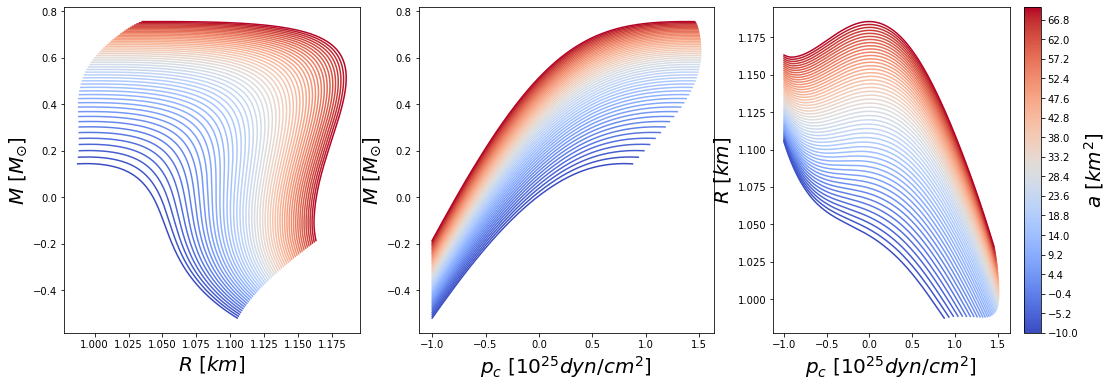

In [ ]:
# Units
units = {
    'M'  :'M_{\odot}',
    'R'  :'km',
    'p_c':'10^{25} dyn/cm^2'
}

df = data.copy()
# All linear
n_lines = int(len(df)/200)

a = alpha_list
clrs = a.copy()
clrs.sort()

norm = mpl.colors.Normalize(vmin=min(a), vmax=max(a))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)
cmap.set_array([])

fig, ax = plt.subplots(1,3, figsize = (18,6))
for i in range(len(alpha_list)):
    temp = df[df['a'] == alpha_list[i]]
    
    r  = temp.R.values
    m  = temp.M.values
    pc = temp.p_c.values
    
    ax[0].plot(r, m, color=cmap.to_rgba(alpha_list[i]))
    # ax[0].tick_params(axis='both', which='major', labelsize=10)
    
    ax[1].plot(pc, m, color=cmap.to_rgba(alpha_list[i]))
    
    ax[2].plot(pc, r, color=cmap.to_rgba(alpha_list[i]))


cbar = fig.colorbar(cmap, ticks=clrs[::3])
cbar.set_label('$a$ [$km^2$]', fontsize = 20, rotation=90)

name = "$R$ [$"+units["R"]+"$]"
ax[0].set_xlabel(name, fontsize = 20)
name = "$M$ [$"+units["M"]+"$]"
ax[0].set_ylabel(name, fontsize = 20)

name = "$p_c$ [$"+units["p_c"]+"$]"
ax[1].set_xlabel(name, fontsize = 20)
name = "$M$ [$"+units["M"]+"$]"
ax[1].set_ylabel(name, fontsize = 20)

name = "$p_c$ [$"+units["p_c"]+"$]"
ax[2].set_xlabel(name, fontsize = 20)
name = "$R$ [$"+units["R"]+"$]"
ax[2].set_ylabel(name, fontsize = 20)

plt.show()


## First train for a single alpha

In [ ]:
alpha_list.sort()
temp = df[df['a'] == alpha_list[23]]
temp.reset_index(drop = True, inplace = True)
temp

p_c         M         R     a
0   -1.000000 -0.348498  1.129117  26.8
1   -0.987421 -0.338819  1.127958  26.8
2   -0.974842 -0.329185  1.126872  26.8
3   -0.962263 -0.319575  1.125852  26.8
4   -0.949684 -0.310016  1.124898  26.8
..        ...       ...       ...   ...
195  1.452881  0.571498  1.004748  26.8
196  1.465460  0.571442  1.002764  26.8
197  1.478039  0.571368  1.000758  26.8
198  1.490618  0.571275  0.998732  26.8
199  1.503197  0.571163  0.996684  26.8

[200 rows x 4 columns]

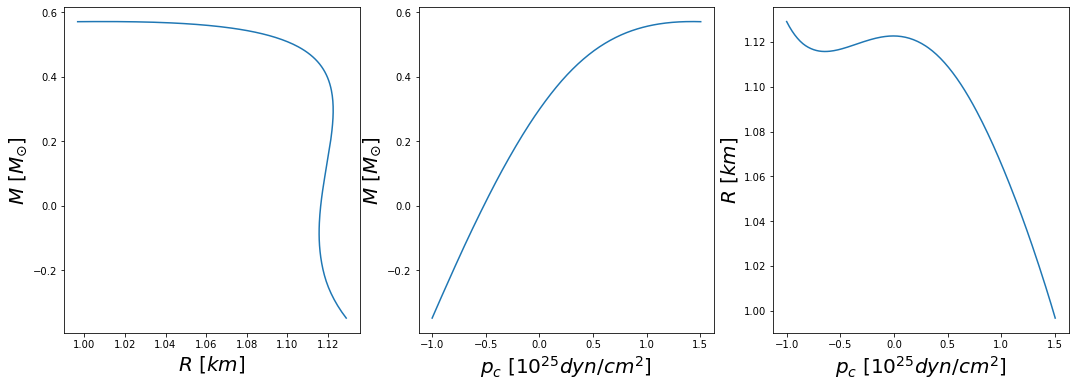

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (18,6))

r  = temp.R.values
m  = temp.M.values
pc = temp.p_c.values

ax[0].plot(r, m)
# ax[0].tick_params(axis='both', which='major', labelsize=10)

ax[1].plot(pc, m)

ax[2].plot(pc, r)

name = "$R$ [$"+units["R"]+"$]"
ax[0].set_xlabel(name, fontsize = 20)
name = "$M$ [$"+units["M"]+"$]"
ax[0].set_ylabel(name, fontsize = 20)

name = "$p_c$ [$"+units["p_c"]+"$]"
ax[1].set_xlabel(name, fontsize = 20)
name = "$M$ [$"+units["M"]+"$]"
ax[1].set_ylabel(name, fontsize = 20)

name = "$p_c$ [$"+units["p_c"]+"$]"
ax[2].set_xlabel(name, fontsize = 20)
name = "$R$ [$"+units["R"]+"$]"
ax[2].set_ylabel(name, fontsize = 20)

plt.show()

In [ ]:
data = temp.copy()

Starting the ANN code!

In [ ]:
X_train, X_test, y_train, y_test, PredictorScalerFit, TargetVarScalerFit, three = myfunc.prepare(data,Predictors = ['p_c'], talk = True)

(140, 1)
(140, 2)
(60, 1)
(60, 2)


2/2 [==============================] - 0s 6ms/step
MPD   :  0.06851  %
MAPE  :  0.244703  %


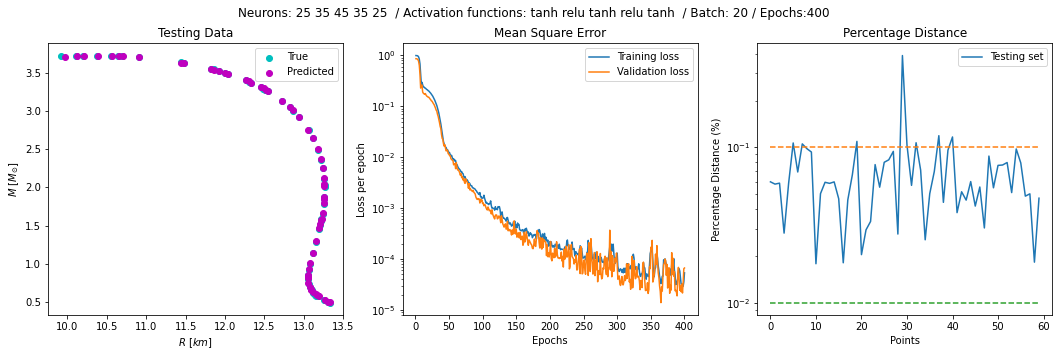

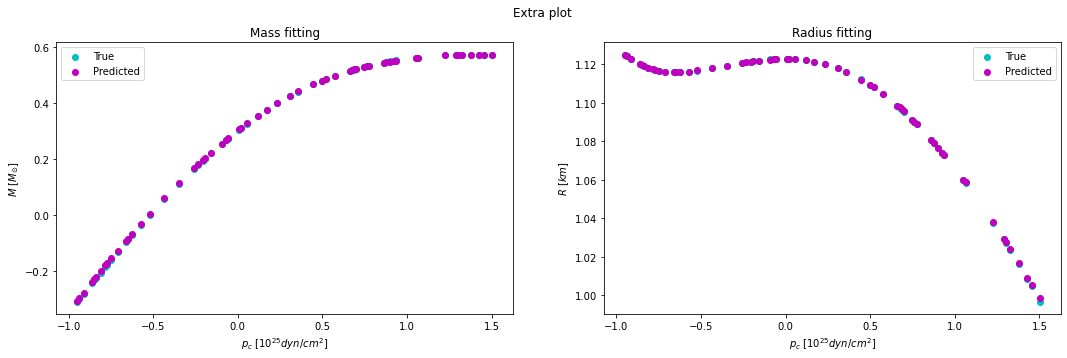

In [ ]:
diction_1, dat_1, model_1 = myfunc.ann(  eps                  = 400,
                                         bat                  = 20,
                                         layers               = 5,
                                         X_train              = X_train,
                                         y_train              = y_train,
                                         X_test               = X_test,
                                         y_test               = y_test,
                                         neur_list            = [25,35,45,35,25],
                                         activation_func_list = ['tanh','relu','tanh','relu','tanh'],
                                         timer                = True,
                                         performance          = True,
                                         show_plot            = True,
                                         show_extra_plot      = True,
                                         PredictorScalerFit   = PredictorScalerFit,
                                         TargetVarScalerFit   = TargetVarScalerFit,
                                         Predictors           = ['p_c'])

In [ ]:
diction_1

{'MPD': [0.06850979755039274],
 'MAPE_R': [0.04065693720624327],
 'MAPE_M': [0.4487481308425114],
 'MAPE': [0.24470253402437733],
 'Max_PD': [0.38989192338138384],
 'Fin_Val_loss': [6.6490909375716e-05],
 'Fin_Train_loss': [5.340735879144631e-05],
 'Min_Val_loss': [[1.3872255294700153e-05, 364]],
 'Min_Train_loss': [[2.904075699916575e-05, 397]],
 'Exe_time': [30.633678913116455],
 'eps': [400],
 'bat': [20],
 'neur_list': [[25, 35, 45, 35, 25]],
 'activation_func_list': [['tanh', 'relu', 'tanh', 'relu', 'tanh']]}

7/7 [==============================] - 0s 3ms/step


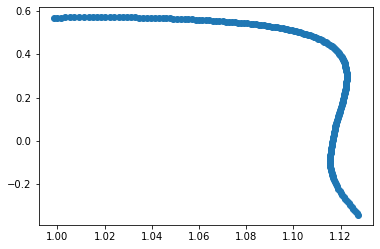

In [ ]:


new_in = np.array([temp.p_c.values]).T

new_in = PredictorScalerFit.transform(new_in)

dedomena = model_1.predict(new_in)
dedomena = TargetVarScalerFit.inverse_transform(dedomena)
# dedomena = 10**dedomena

plt.scatter(dedomena.T[1], dedomena.T[0])

In [ ]:
temp

p_c         M         R     a
0   -1.000000 -0.348498  1.129117  26.8
1   -0.987421 -0.338819  1.127958  26.8
2   -0.974842 -0.329185  1.126872  26.8
3   -0.962263 -0.319575  1.125852  26.8
4   -0.949684 -0.310016  1.124898  26.8
..        ...       ...       ...   ...
195  1.452881  0.571498  1.004748  26.8
196  1.465460  0.571442  1.002764  26.8
197  1.478039  0.571368  1.000758  26.8
198  1.490618  0.571275  0.998732  26.8
199  1.503197  0.571163  0.996684  26.8

[200 rows x 4 columns]

In [ ]:
temp_1 = temp.copy()

temp_1['M'] = (temp_1['M'].values - dedomena.T[0])
temp_1['R'] = (temp_1['R'].values - dedomena.T[1])
temp_1

p_c         M         R     a
0   -1.000000 -0.018331  0.001649  26.8
1   -0.987421 -0.016681  0.001160  26.8
2   -0.974842 -0.015309  0.000749  26.8
3   -0.962263 -0.014200  0.000405  26.8
4   -0.949684 -0.013387  0.000132  26.8
..        ...       ...       ...   ...
195  1.452881  0.002198 -0.000020  26.8
196  1.465460  0.002509 -0.000205  26.8
197  1.478039  0.002798 -0.000488  26.8
198  1.490618  0.003062 -0.000868  26.8
199  1.503197  0.003300 -0.001344  26.8

[200 rows x 4 columns]

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1, PredictorScalerFit_1, TargetVarScalerFit_1, three_1 = myfunc.prepare(temp_1, Predictors = ['p_c'], talk = True)

(140, 1)
(140, 2)
(60, 1)
(60, 2)


2/2 [==============================] - 0s 3ms/step
MPD   :  0.154548  %
MAPE  :  0.119584  %


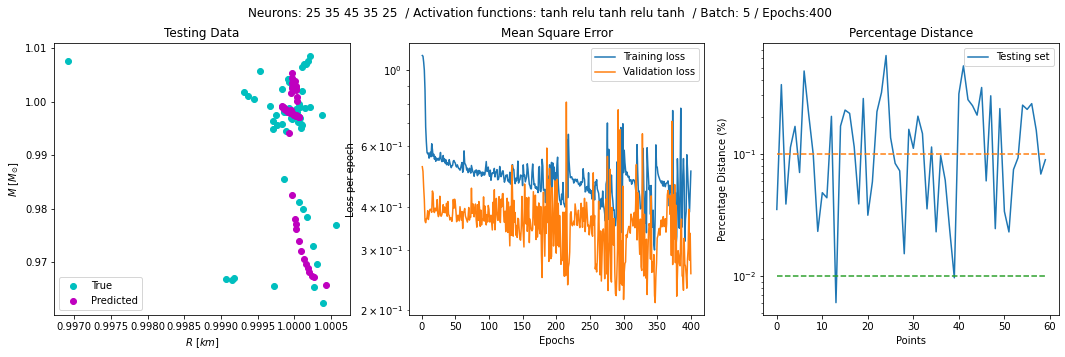

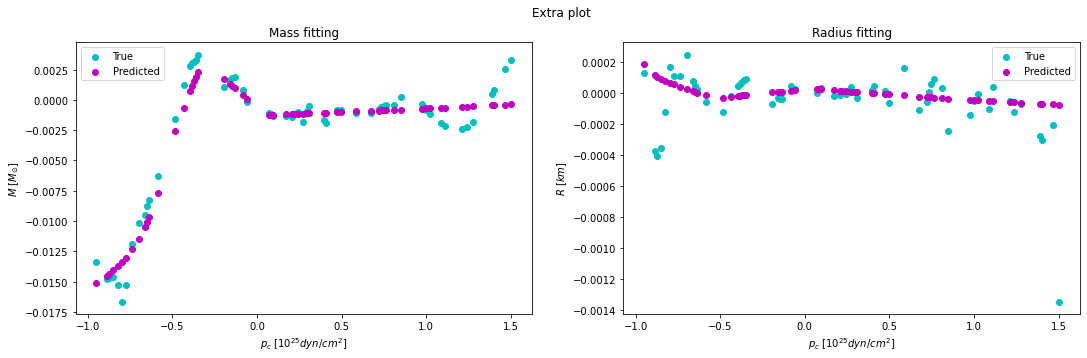

In [ ]:
diction_2, dat_2, model_2 = myfunc.ann(  eps                  = 400,
                                         bat                  = 5,
                                         layers               = 5,
                                         X_train              = X_train_1,
                                         y_train              = y_train_1,
                                         X_test               = X_test_1,
                                         y_test               = y_test_1,
                                         neur_list            = [25,35,45,35,25],
                                         activation_func_list = ['tanh','relu','tanh','relu','tanh'],
                                         timer                = True,
                                         performance          = True,
                                         show_plot            = True,
                                         show_extra_plot      = True,
                                         PredictorScalerFit   = PredictorScalerFit_1,
                                         TargetVarScalerFit   = TargetVarScalerFit_1,
                                         Predictors           = ['p_c'])

7/7 [==============================] - 0s 2ms/step


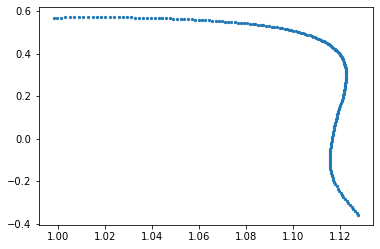

In [ ]:
new_in = np.array([temp.p_c.values]).T

new_in = PredictorScalerFit_1.transform(new_in)

dedomena_1 = model_1.predict(new_in)
dedomena_1 = TargetVarScalerFit.inverse_transform(dedomena_1)
# dedomena = 10**dedomena

dedomena_2 = model_2.predict(new_in)
dedomena_2 = TargetVarScalerFit_1.inverse_transform(dedomena_2)

dedomena = dedomena_1 + dedomena_2
plt.scatter(dedomena.T[1], dedomena.T[0], s = 5)

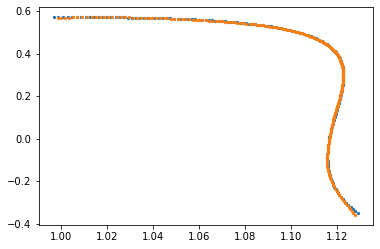

In [ ]:
x1 = temp.R.values
y1 = temp.M.values

x2 = dedomena.T[1]
y2 = dedomena.T[0]

plt.scatter(x1, y1, s = 5)
plt.scatter(x2, y2, s = 5)


In [ ]:
# MAPE_R
mape_R = 100*np.mean(np.abs((10**x1 - 10**x2)/(10**x1)))

# MAPE_M
mape_M = 100*np.mean(np.abs((10**y1 - 10**y2)/(10**y2)))


In [ ]:
mape_R, mape_M

(0.039387197597468296, 0.5988602417041072)

## What I have done so far

In [ ]:
from pathlib import Path
import glob

path0 = Path(r"C:\Users\Desktop\Giannis\EGB\tuning_data")

file_list = glob.glob(str(path0.joinpath("*")))
file_list

['C:\\Users\\Αναστασία\\Desktop\\Giannis\\EGB\\tuning_data\\best_model_change_eps_bat.csv',
 'C:\\Users\\Αναστασία\\Desktop\\Giannis\\EGB\\tuning_data\\dif_alpha.csv',
 'C:\\Users\\Αναστασία\\Desktop\\Giannis\\EGB\\tuning_data\\lay3_neurchange_1.csv',
 'C:\\Users\\Αναστασία\\Desktop\\Giannis\\EGB\\tuning_data\\lay5_neurchange_0.csv',
 'C:\\Users\\Αναστασία\\Desktop\\Giannis\\EGB\\tuning_data\\lay5_neurchange_2.csv']

In [ ]:
df_perf = pd.DataFrame({})
for file_name in file_list:
    temp = pd.read_csv(file_name)
    frames = [df_perf,temp]
    df_perf = pd.concat(frames, ignore_index = True)
    
df_perf

Unnamed: 0       MPD    MAPE_R    MAPE_M      MAPE    Max_PD  \
0             0  0.111772  0.100276  0.254214  0.177245  0.390795   
1             1  0.062516  0.044966  0.183736  0.114351  0.212202   
2             2  0.075674  0.051860  0.344721  0.198291  0.272178   
3             3  0.095841  0.064516  0.394727  0.229621  0.379221   
4             4  0.133877  0.105409  0.383610  0.244509  0.350218   
..          ...       ...       ...       ...       ...       ...   
174          11  0.058778  0.034097  0.334995  0.184546  0.189080   
175          12  0.044183  0.029774  0.147962  0.088868  0.150960   
176          13  0.033145  0.020438  0.135962  0.078200  0.104123   
177          14  0.167817  0.120495  0.649401  0.384948  0.278660   
178          15  0.040238  0.024704  0.193055  0.108880  0.092565   

     Fin_Val_loss  Fin_Train_loss                   Min_Val_loss  \
0        0.000258        0.000171   [7.051154534565285e-05, 384]   
1        0.000122        0.000103  [0.00012158718891441822, 399]   
2        0.000170        0.000081  [0.00014843771350570023, 396]   
3        0.000266        0.000173   [0.0002664024068508297, 399]   
4        0.000452        0.000272   [0.0004520413640420884, 399]   
..            ...             ...                            ...   
174      0.000068        0.000057   [5.452899858937599e-05, 397]   
175      0.000055        0.000062   [4.854992585023865e-05, 394]   
176      0.000034        0.000027  [3.4334956581005827e-05, 399]   
177      0.000216        0.000119   [9.258467616746202e-05, 388]   
178      0.000043        0.000028   [3.589202606235631e-05, 393]   

                    Min_Train_loss   Exe_time  eps  bat             neur_list  \
0     [5.491050978889689e-05, 388]  17.983840  400   20  [25, 35, 45, 35, 25]   
1     [8.115663513308391e-05, 393]  15.981446  400   30  [25, 35, 45, 35, 25]   
2      [8.05600211606361e-05, 399]  14.824841  400   40  [25, 35, 45, 35, 25]   
3    [0.00014417956117540598, 396]  15.546235  400   50  [25, 35, 45, 35, 25]   
4    [0.00026729836827144027, 397]  14.701735  400   60  [25, 35, 45, 35, 25]   
..                             ...        ...  ...  ...                   ...   
174  [4.9555532314116135e-05, 396]  37.728693  400   20  [25, 35, 40, 35, 25]   
175    [3.88073967769742e-05, 392]  35.244178  400   20  [25, 35, 45, 30, 25]   
176   [2.231838516308926e-05, 376]  36.290957  400   20  [25, 35, 45, 35, 25]   
177   [7.013270078459755e-05, 386]  37.261301  400   20  [25, 35, 50, 30, 25]   
178  [2.7765609047492035e-05, 399]  37.155740  400   20  [25, 35, 50, 35, 25]   

                         activation_func_list  
0    ['tanh', 'relu', 'tanh', 'relu', 'tanh']  
1    ['tanh', 'relu', 'tanh', 'relu', 'tanh']  
2    ['tanh', 'relu', 'tanh', 'relu', 'tanh']  
3    ['tanh', 'relu', 'tanh', 'relu', 'tanh']  
4    ['tanh', 'relu', 'tanh', 'relu', 'tanh']  
..                                        ...  
174  ['tanh', 'relu', 'tanh', 'relu', 'tanh']  
175  ['tanh', 'relu', 'tanh', 'relu', 'tanh']  
176  ['tanh', 'relu', 'tanh', 'relu', 'tanh']  
177  ['tanh', 'relu', 'tanh', 'relu', 'tanh']  
178  ['tanh', 'relu', 'tanh', 'relu', 'tanh']  

[179 rows x 15 columns]

In [ ]:
best_MPD  = df_perf.loc[df_perf['MPD']    == df_perf.MPD.values.min()].copy()
best_MAPE = df_perf.loc[df_perf['MAPE']   == df_perf.MAPE.values.min()].copy()
best_R    = df_perf.loc[df_perf['MAPE_R'] == df_perf.MAPE_R.values.min()].copy()
best_M    = df_perf.loc[df_perf['MAPE_M'] == df_perf.MAPE_M.values.min()].copy()
best_loss = df_perf.loc[df_perf['Fin_Train_loss'] == df_perf.Fin_Train_loss.values.min()].copy()
best_max  = df_perf.loc[df_perf['Max_PD'] == df_perf.Max_PD.values.min()].copy()


best_MPD['best']  = ['MPD']
best_MAPE['best'] = ['MAPE']
best_R['best']    = ['MAPE_R']
best_M['best']    = ['MAPE_M']
best_loss['best'] = ['Fin_Train_loss']
best_max['best']  = ['Max_PD']




best_frames = [best_MPD, best_MAPE, best_R, best_M, best_loss, best_max]

best_models = pd.concat(best_frames)
best_models.reset_index(inplace = True)
best_models

index  Unnamed: 0       MPD    MAPE_R    MAPE_M      MAPE    Max_PD  \
0     37           7  0.031940  0.015669  0.247883  0.131776  0.081780   
1    176          13  0.033145  0.020438  0.135962  0.078200  0.104123   
2     37           7  0.031940  0.015669  0.247883  0.131776  0.081780   
3     35           5  0.049691  0.046097  0.127137  0.086617  0.173293   
4     25          25  0.036070  0.022114  0.143834  0.082974  0.097726   
5     37           7  0.031940  0.015669  0.247883  0.131776  0.081780   

   Fin_Val_loss  Fin_Train_loss                   Min_Val_loss  \
0      0.000032        0.000026  [2.5347198970848694e-05, 397]   
1      0.000034        0.000027  [3.4334956581005827e-05, 399]   
2      0.000032        0.000026  [2.5347198970848694e-05, 397]   
3      0.000089        0.000081    [7.71173436078243e-05, 393]   
4      0.000032        0.000016   [2.789379686873872e-05, 596]   
5      0.000032        0.000026  [2.5347198970848694e-05, 397]   

                  Min_Train_loss   Exe_time  eps  bat             neur_list  \
0  [2.0046734789502807e-05, 393]  30.278237  400   20  [25, 35, 45, 35, 25]   
1   [2.231838516308926e-05, 376]  36.290957  400   20  [25, 35, 45, 35, 25]   
2  [2.0046734789502807e-05, 393]  30.278237  400   20  [25, 35, 45, 35, 25]   
3   [6.585728988284245e-05, 381]  30.946690  400   20  [25, 35, 45, 35, 25]   
4  [1.4188699424266815e-05, 595]  27.528975  600   30  [25, 35, 45, 35, 25]   
5  [2.0046734789502807e-05, 393]  30.278237  400   20  [25, 35, 45, 35, 25]   

                       activation_func_list            best  
0  ['tanh', 'relu', 'tanh', 'relu', 'tanh']             MPD  
1  ['tanh', 'relu', 'tanh', 'relu', 'tanh']            MAPE  
2  ['tanh', 'relu', 'tanh', 'relu', 'tanh']          MAPE_R  
3  ['tanh', 'relu', 'tanh', 'relu', 'tanh']          MAPE_M  
4  ['tanh', 'relu', 'tanh', 'relu', 'tanh']  Fin_Train_loss  
5  ['tanh', 'relu', 'tanh', 'relu', 'tanh']          Max_PD

## Best model:

In [ ]:
best_models.loc[best_models.index    == 0]

index  Unnamed: 0      MPD    MAPE_R    MAPE_M      MAPE   Max_PD  \
0     37           7  0.03194  0.015669  0.247883  0.131776  0.08178   

   Fin_Val_loss  Fin_Train_loss                   Min_Val_loss  \
0      0.000032        0.000026  [2.5347198970848694e-05, 397]   

                  Min_Train_loss   Exe_time  eps  bat             neur_list  \
0  [2.0046734789502807e-05, 393]  30.278237  400   20  [25, 35, 45, 35, 25]   

                       activation_func_list best  
0  ['tanh', 'relu', 'tanh', 'relu', 'tanh']  MPD

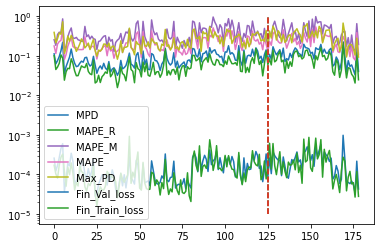

In [ ]:
keys = df_perf.keys()

for key in keys[1:8]:
    if (key == "Min_Val_loss") or (key == "Min_Train_loss"):
        plt.semilogy(df_perf[key], label = key)
    else:
        plt.semilogy(df_perf[key], label = key)
        
    plt.semilogy(125*np.ones(100), np.logspace(-5,0,100, base = 10), '--')

plt.legend()
plt.show()

In [ ]:
best_model = best_models.loc[best_models.index    == 0].copy()
best_model

index  Unnamed: 0      MPD    MAPE_R    MAPE_M      MAPE   Max_PD  \
0     37           7  0.03194  0.015669  0.247883  0.131776  0.08178   

   Fin_Val_loss  Fin_Train_loss                   Min_Val_loss  \
0      0.000032        0.000026  [2.5347198970848694e-05, 397]   

                  Min_Train_loss   Exe_time  eps  bat             neur_list  \
0  [2.0046734789502807e-05, 393]  30.278237  400   20  [25, 35, 45, 35, 25]   

                       activation_func_list best  
0  ['tanh', 'relu', 'tanh', 'relu', 'tanh']  MPD

In [ ]:
keys = best_model.keys()
keys

Index(['index', 'Unnamed: 0', 'MPD', 'MAPE_R', 'MAPE_M', 'MAPE', 'Max_PD',
       'Fin_Val_loss', 'Fin_Train_loss', 'Min_Val_loss', 'Min_Train_loss',
       'Exe_time', 'eps', 'bat', 'neur_list', 'activation_func_list', 'best'],
      dtype='object')

In [ ]:
for key in keys[12:-1]:
    print(key, ": ", best_model[key][0])

eps :  400
bat :  20
neur_list :  [25, 35, 45, 35, 25]
activation_func_list :  ['tanh', 'relu', 'tanh', 'relu', 'tanh']


(140, 1)
(140, 2)
(60, 1)
(60, 2)
2/2 [==============================] - 0s 3ms/step
MPD   :  0.084256  %
MAPE  :  0.318434  %


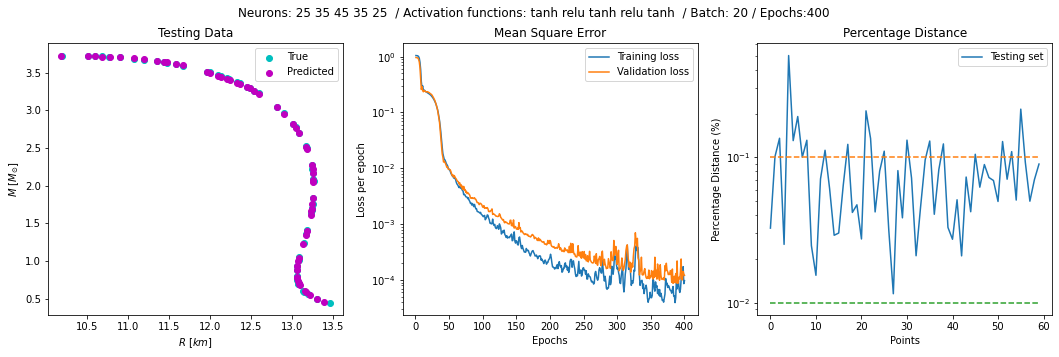

In [ ]:
# Read the data
df_alpha = pd.read_csv(r"C:\Users\Desktop\Giannis\EGB\alpha_list.csv")
alpha_list = list(df_alpha.a.values)

df_data = pd.read_csv(r"C:\Users\Desktop\Giannis\EGB\MRpa_data.csv")


# Log the data approprietly
df_data = myfunc.logdata(data     = df_data,
                      log_vars = ['p_c','M','R'],
                      lin_vars = ['a'])

# Select one alpha
df = df_data.copy()
alpha_list.sort()
temp = df[df['a'] == alpha_list[23]]
temp.reset_index(drop = True, inplace = True)
temp
data = temp.copy()

# Prepare the data
X_train, X_test, y_train, y_test, PredictorScalerFit, TargetVarScalerFit = myfunc.prepare(data, ['p_c'] , True)

# Train the model
diction = myfunc.ann(eps                  = 400,
                     bat                  = 20,
                     layers               = 5,
                     X_train              = X_train,
                     y_train              = y_train,
                     X_test               = X_test,
                     y_test               = y_test,
                     neur_list            = [25, 35, 45, 35, 25],
                     activation_func_list = ['tanh', 'relu', 'tanh', 'relu', 'tanh'],
                     timer                = True,
                     performance          = True,
                     show_plot            = True,
                     show_extra_plot      = False,
                     PredictorScalerFit   = PredictorScalerFit,
                     TargetVarScalerFit   = TargetVarScalerFit,
                     Predictors           = ['p_c'])

In [ ]:
def best_model(X_train, X_test, y_train, y_test, PredictorScalerFit, TargetVarScalerFit):
    dictio = myfunc.ann( eps                  = 400,
                         bat                  = 20,
                         layers               = 5,
                         X_train              = X_train,
                         y_train              = y_train,
                         X_test               = X_test,
                         y_test               = y_test,
                         neur_list            = [25, 35, 45, 35, 25],
                         activation_func_list = ['tanh', 'relu', 'tanh', 'relu', 'tanh'],
                         timer                = True,
                         performance          = True,
                         show_plot            = True,
                         show_extra_plot      = True,
                         PredictorScalerFit   = PredictorScalerFit,
                         TargetVarScalerFit   = TargetVarScalerFit,
                         Predictors           = ['p_c'])
    return dictio

## Try fitting data for different alphas

In [ ]:
# Read the data
df_alpha = pd.read_csv(r"C:\Users\Desktop\Giannis\EGB\alpha_list.csv")
alpha_list = list(df_alpha.a.values)
alpha_list.sort()

df_data = pd.read_csv(r"C:\Users\Desktop\Giannis\EGB\MRpa_data.csv")


# Log the data approprietly
df_data = myfunc.logdata(data     = df_data,
                         log_vars = ['p_c','M','R'],
                         lin_vars = ['a'])

a =  -10.0
2/2 [==============================] - 0s 8ms/step
MPD   :  0.048956  %
MAPE  :  0.180701  %


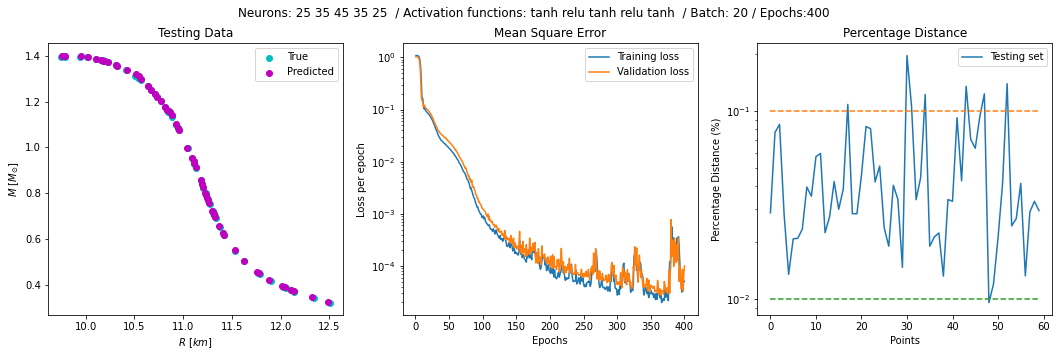

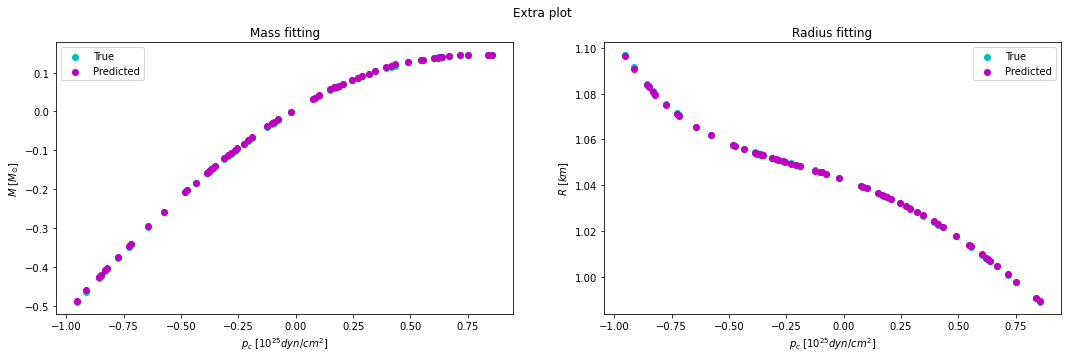

a =  -8.4
2/2 [==============================] - 0s 7ms/step
MPD   :  0.04367  %
MAPE  :  0.100227  %


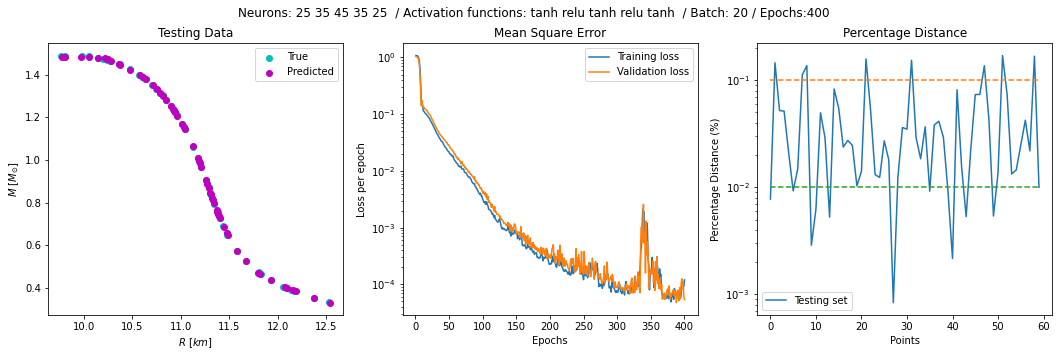

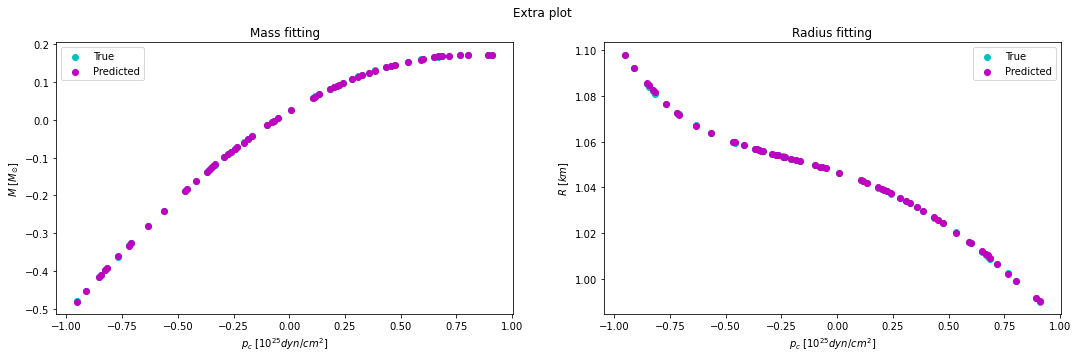

a =  -6.8
2/2 [==============================] - 0s 4ms/step
MPD   :  0.071212  %
MAPE  :  0.179325  %


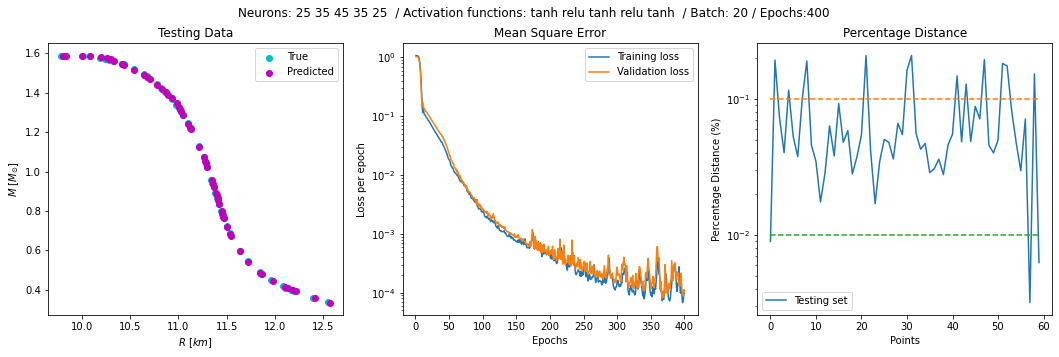

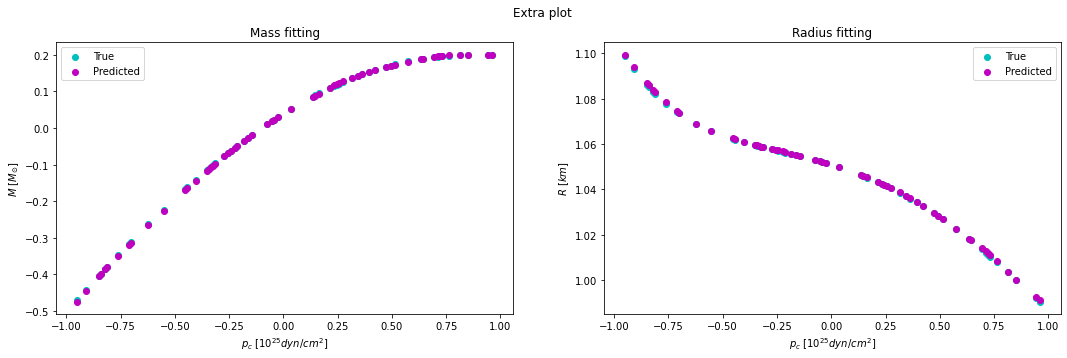

a =  -5.2
2/2 [==============================] - 0s 5ms/step
MPD   :  0.038772  %
MAPE  :  0.132131  %


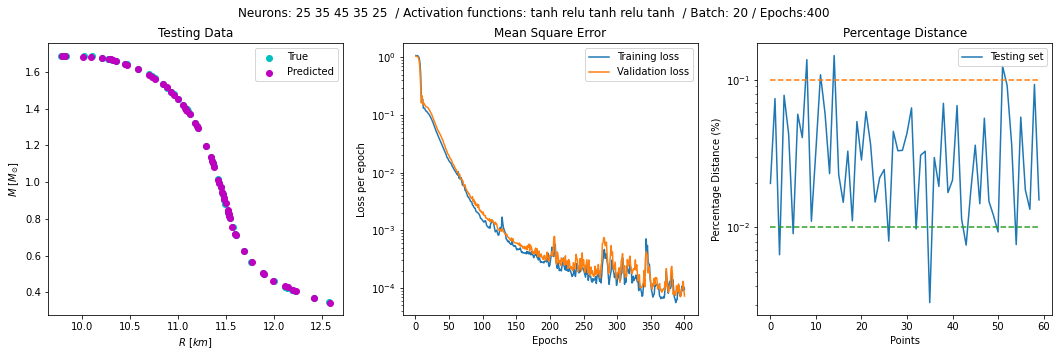

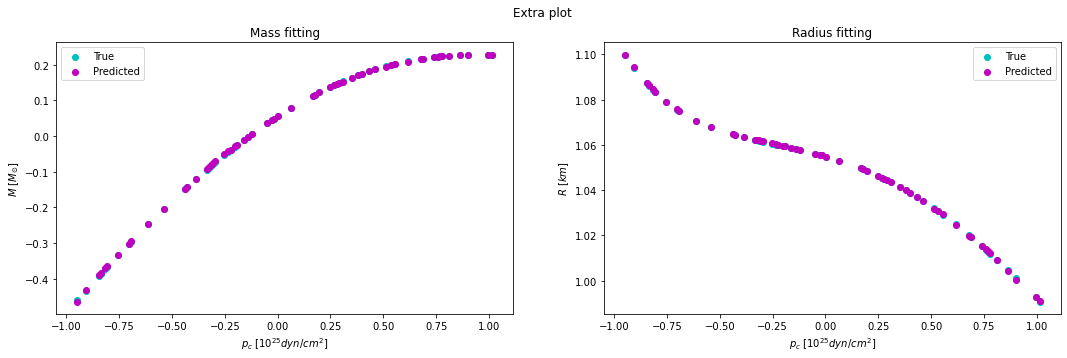

a =  -3.6
2/2 [==============================] - 0s 3ms/step
MPD   :  0.046108  %
MAPE  :  0.145477  %


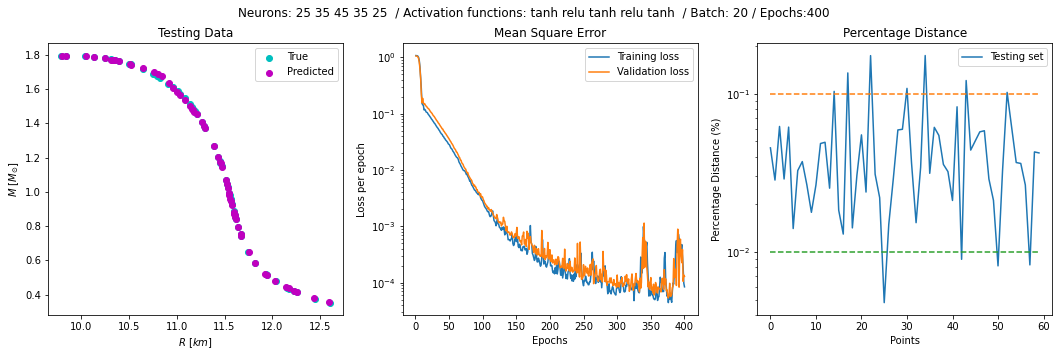

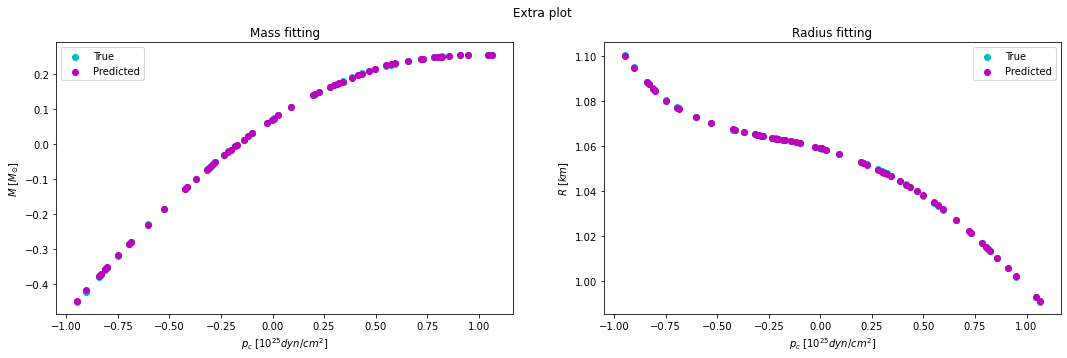

a =  -2.0
2/2 [==============================] - 0s 3ms/step
MPD   :  0.049691  %
MAPE  :  0.086617  %


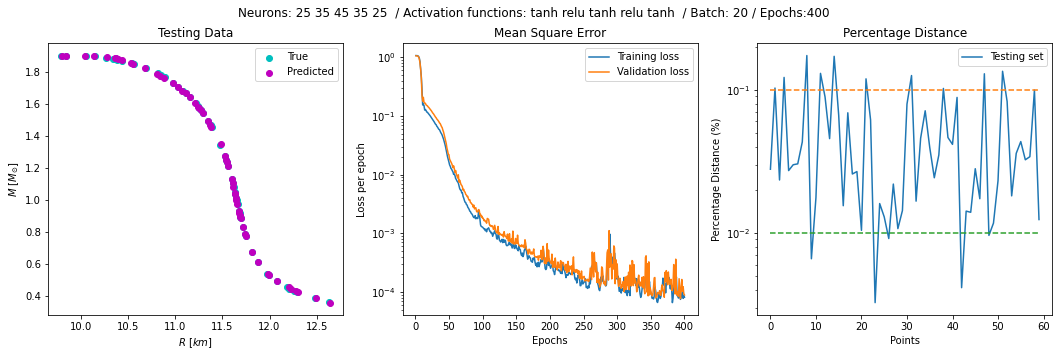

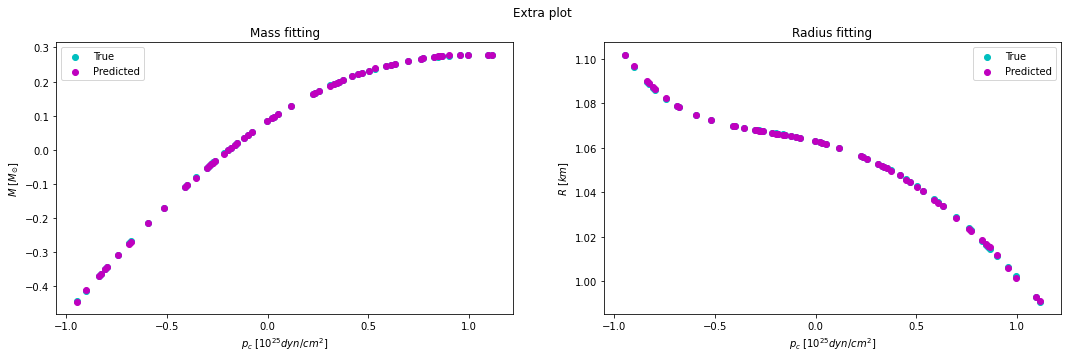

a =  -0.4
2/2 [==============================] - 0s 3ms/step
MPD   :  0.041972  %
MAPE  :  0.1228  %


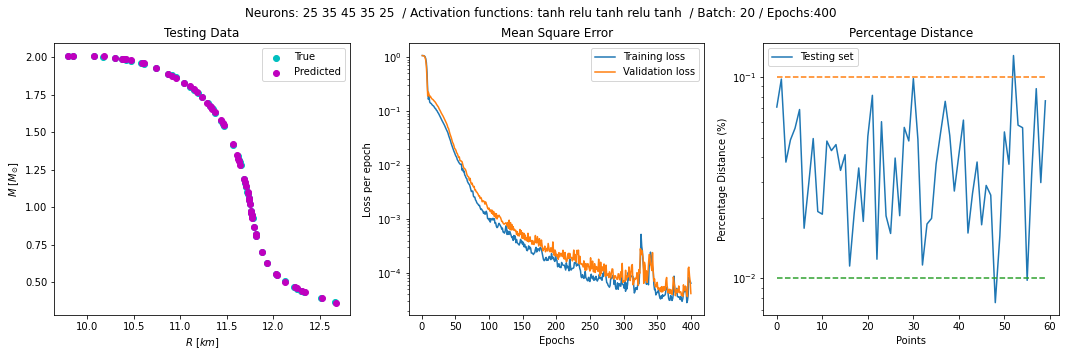

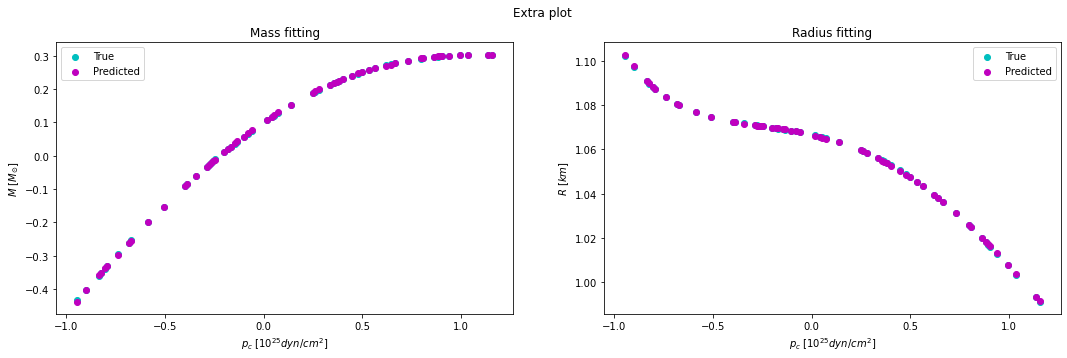

a =  1.2
2/2 [==============================] - 0s 2ms/step
MPD   :  0.03194  %
MAPE  :  0.131776  %


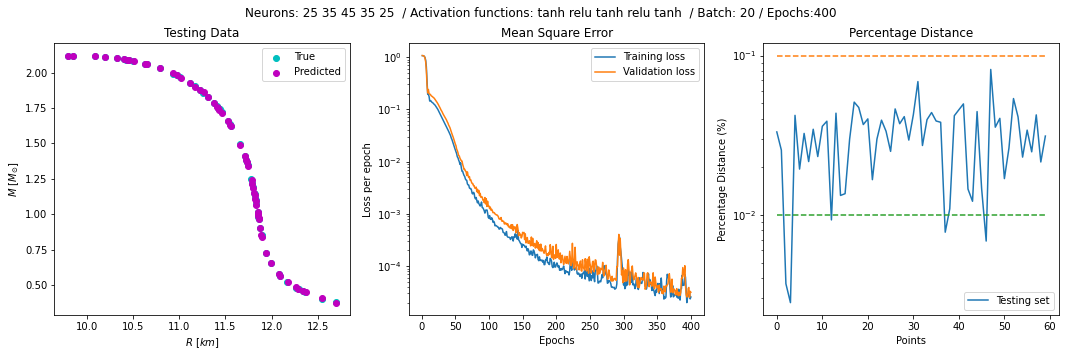

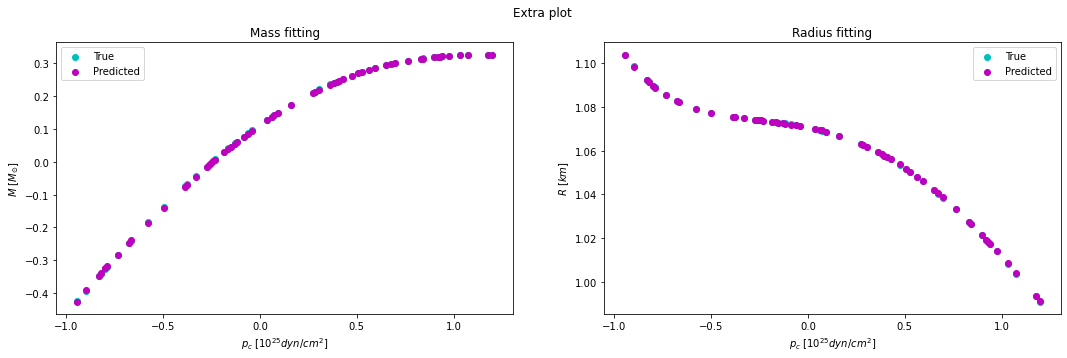

a =  2.8
2/2 [==============================] - 0s 2ms/step
MPD   :  0.039695  %
MAPE  :  0.146635  %


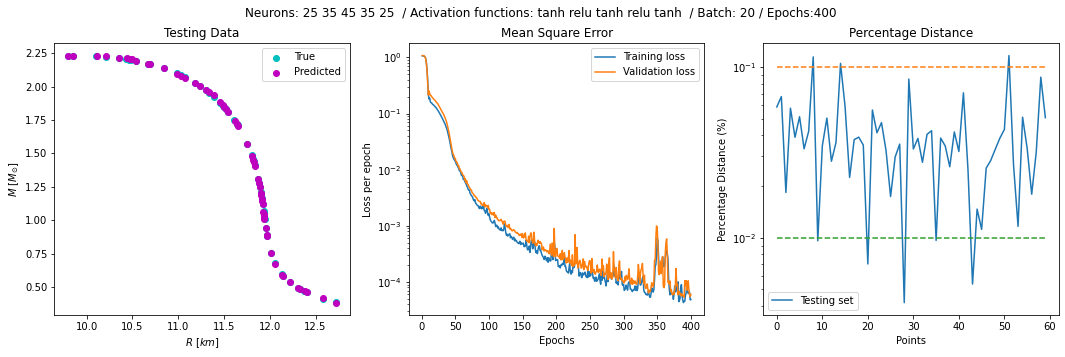

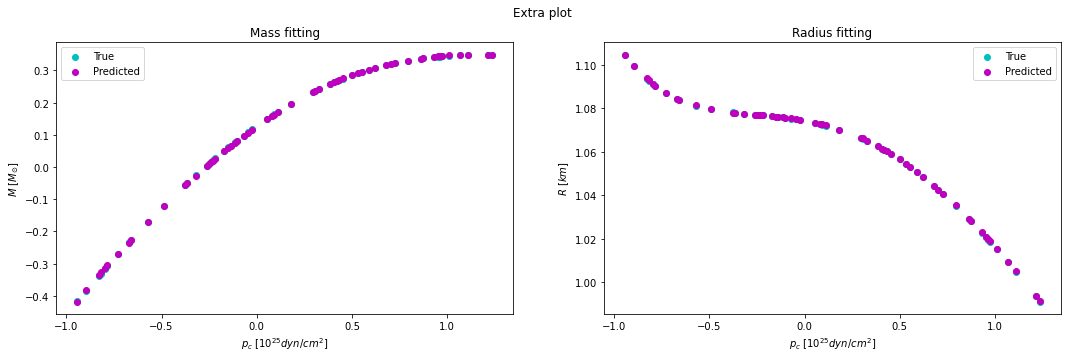

a =  4.4
2/2 [==============================] - 0s 2ms/step
MPD   :  0.076209  %
MAPE  :  0.2093  %


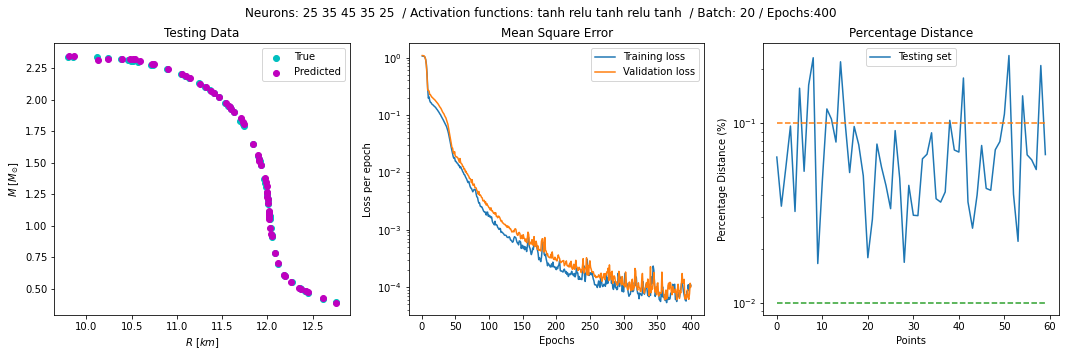

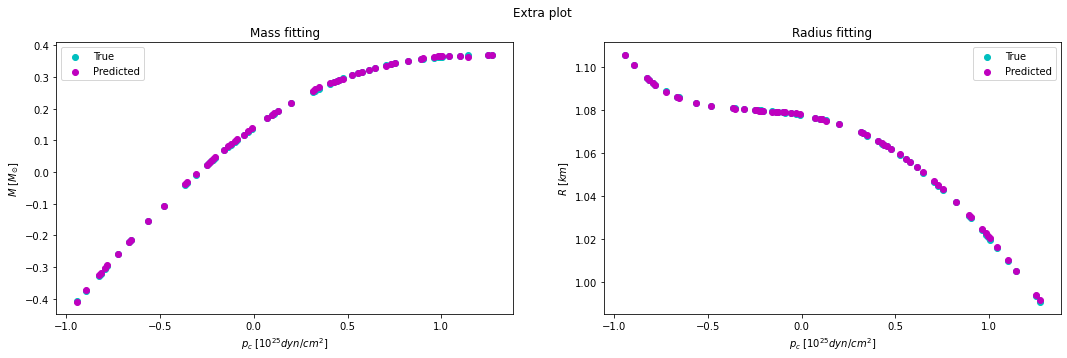

a =  6.0
2/2 [==============================] - 0s 3ms/step
MPD   :  0.046652  %
MAPE  :  0.120735  %


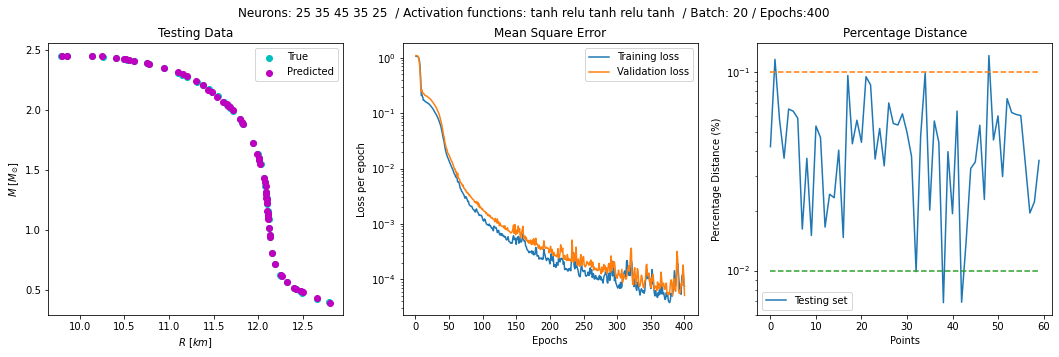

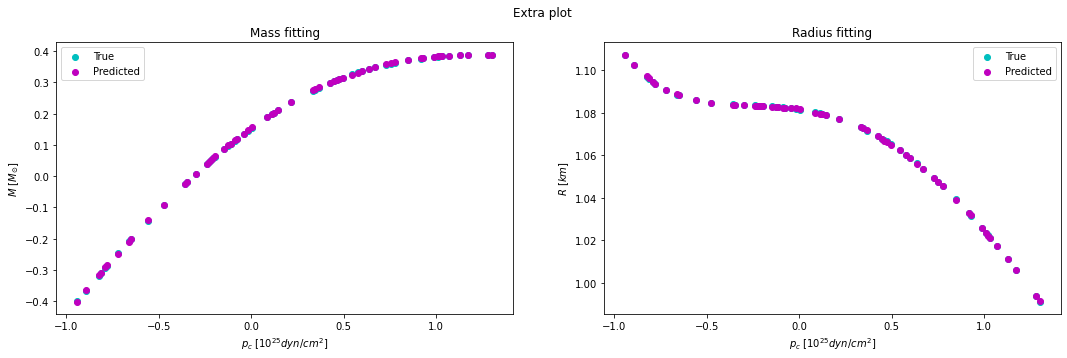

a =  7.6
2/2 [==============================] - 0s 2ms/step
MPD   :  0.05009  %
MAPE  :  0.162738  %


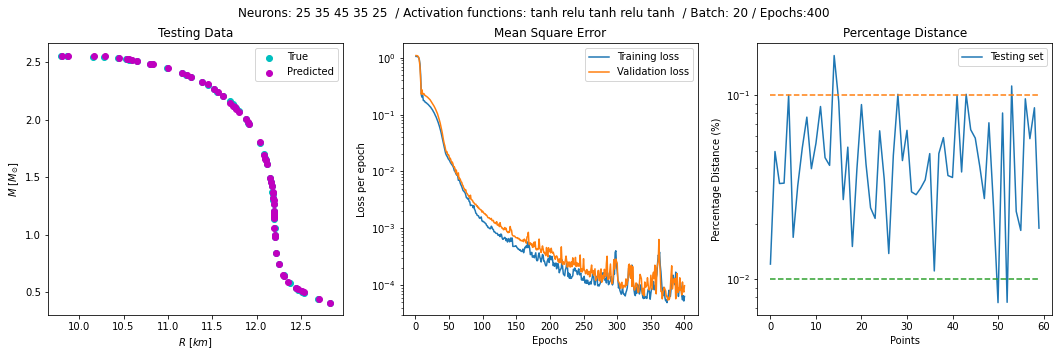

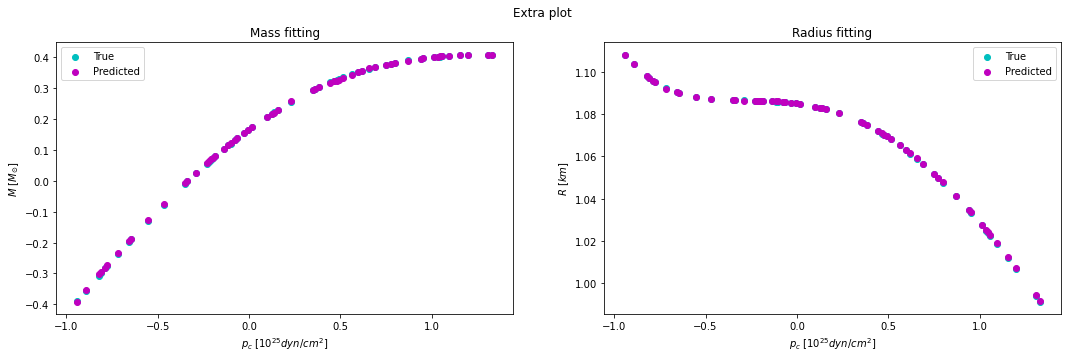

a =  9.2
2/2 [==============================] - 0s 2ms/step
MPD   :  0.056573  %
MAPE  :  0.211399  %


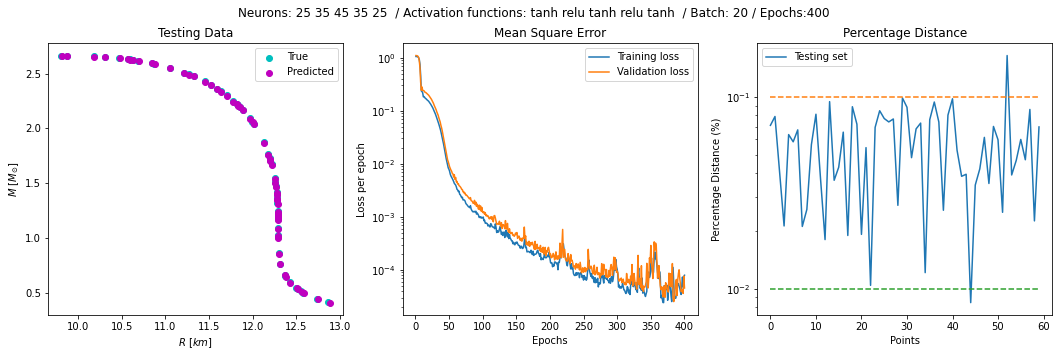

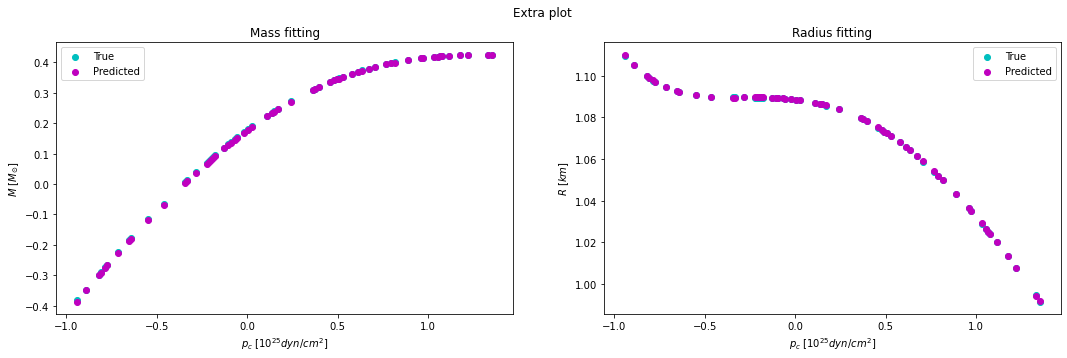

a =  10.8
2/2 [==============================] - 0s 2ms/step
MPD   :  0.078142  %
MAPE  :  0.212226  %


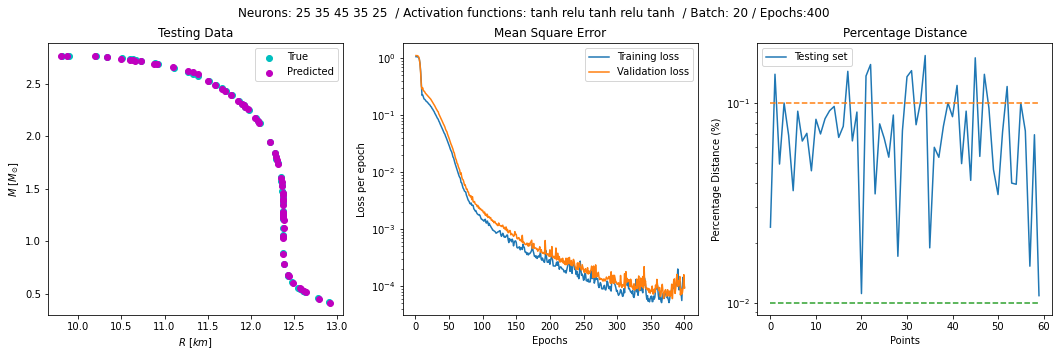

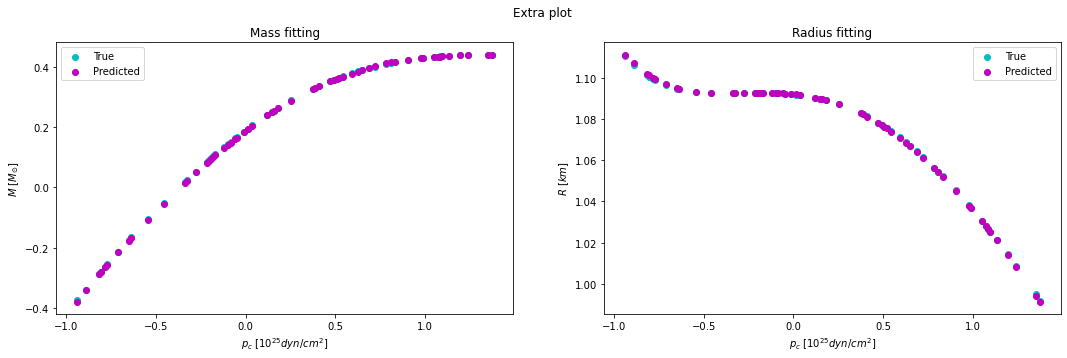

a =  12.4
2/2 [==============================] - 0s 3ms/step
MPD   :  0.116835  %
MAPE  :  0.287661  %


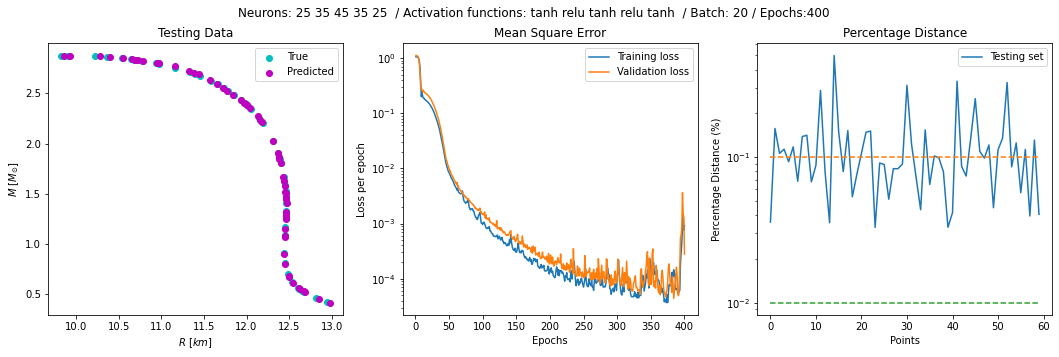

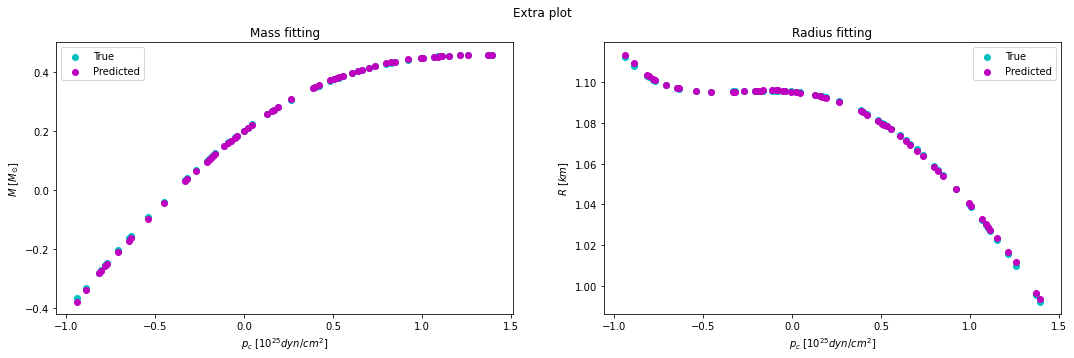

a =  14.0
2/2 [==============================] - 0s 2ms/step
MPD   :  0.061571  %
MAPE  :  0.164626  %


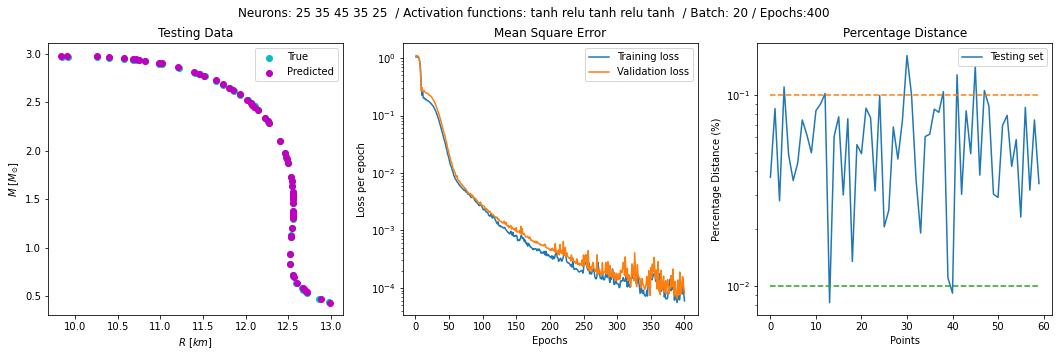

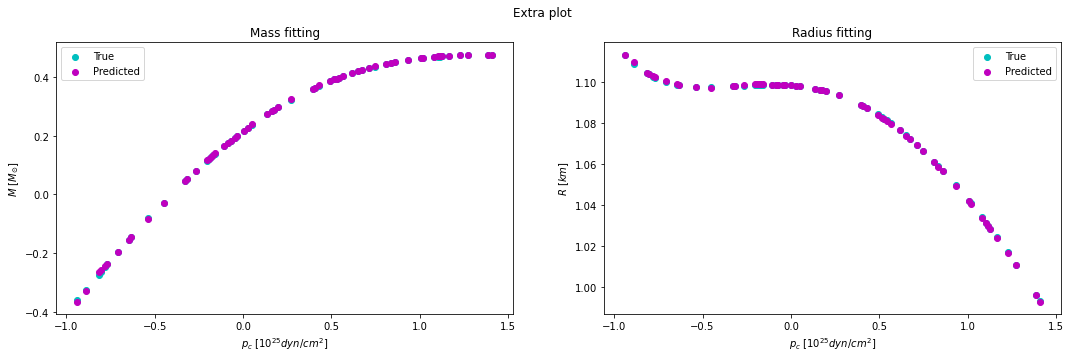

a =  15.6
2/2 [==============================] - 0s 3ms/step
MPD   :  0.057018  %
MAPE  :  0.137995  %


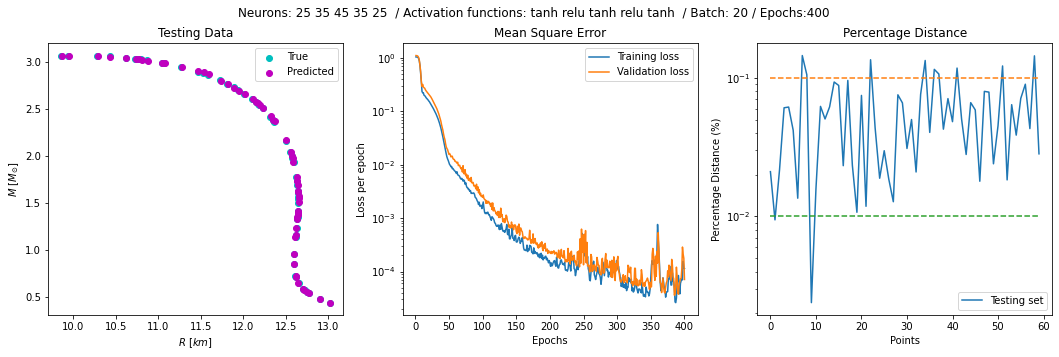

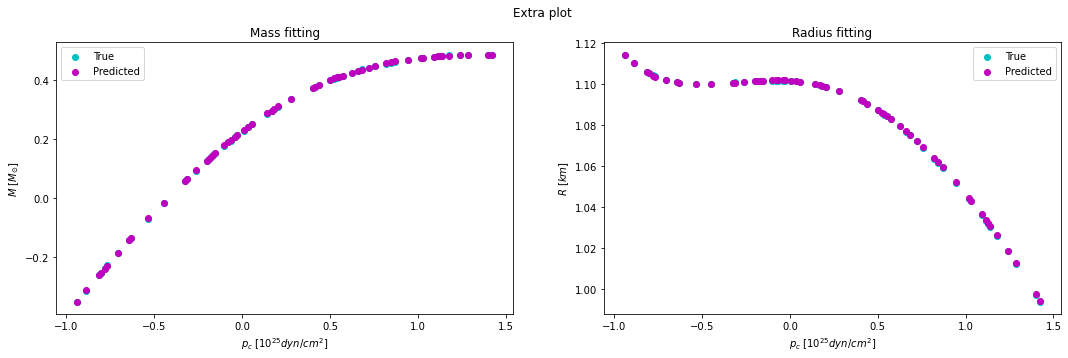

a =  17.2
2/2 [==============================] - 0s 3ms/step
MPD   :  0.048776  %
MAPE  :  0.150911  %


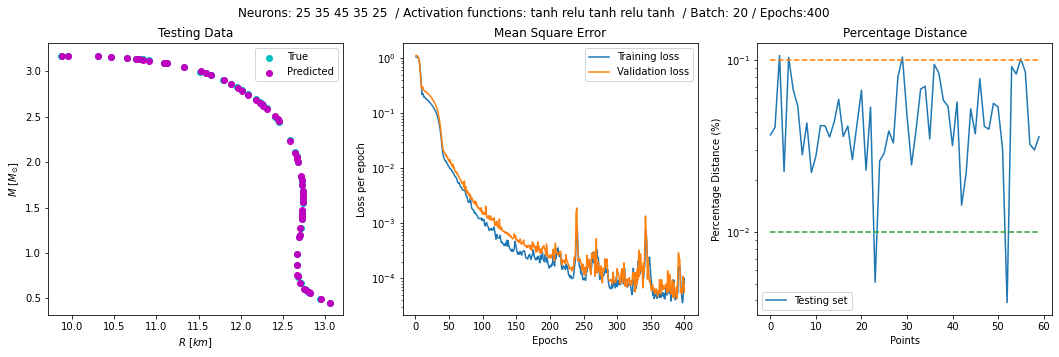

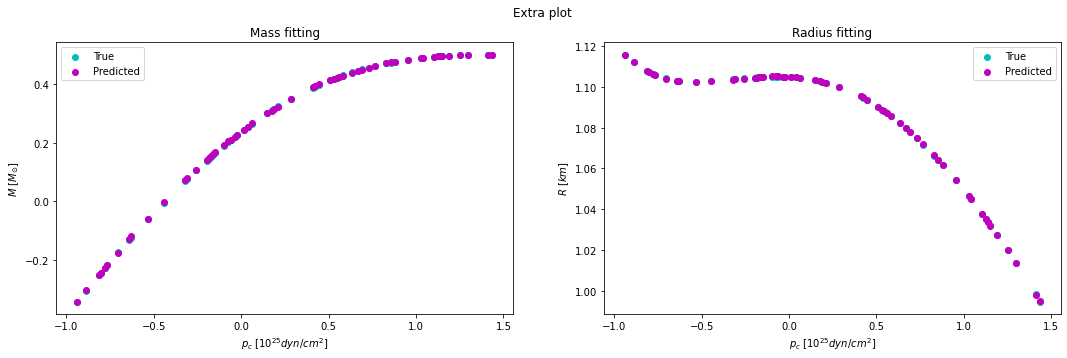

a =  18.8
2/2 [==============================] - 0s 3ms/step
MPD   :  0.103093  %
MAPE  :  0.357126  %


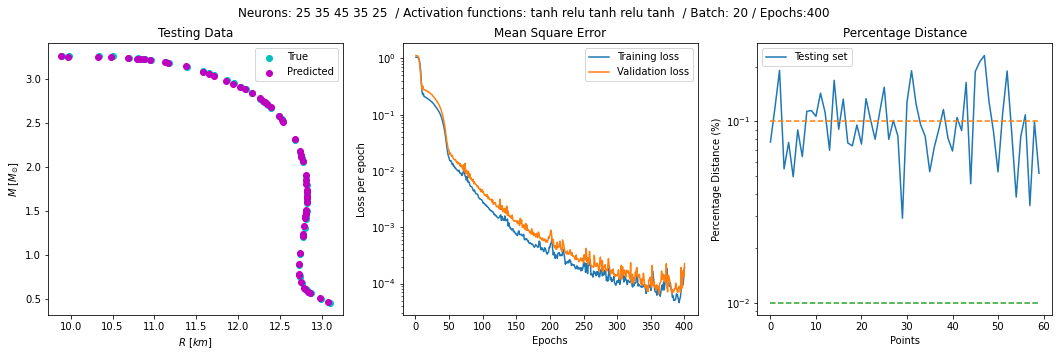

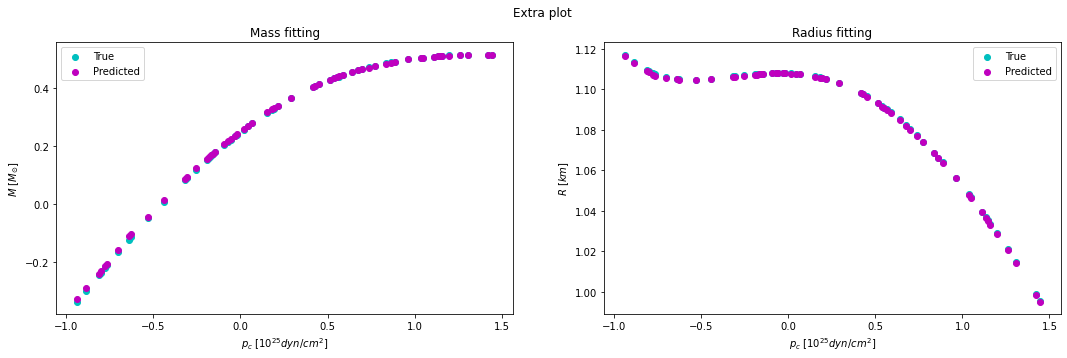

a =  20.4
2/2 [==============================] - 0s 2ms/step
MPD   :  0.120221  %
MAPE  :  0.403973  %


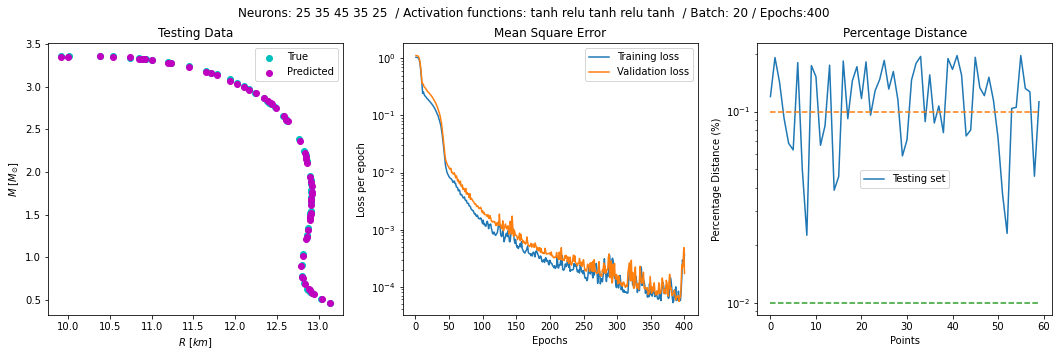

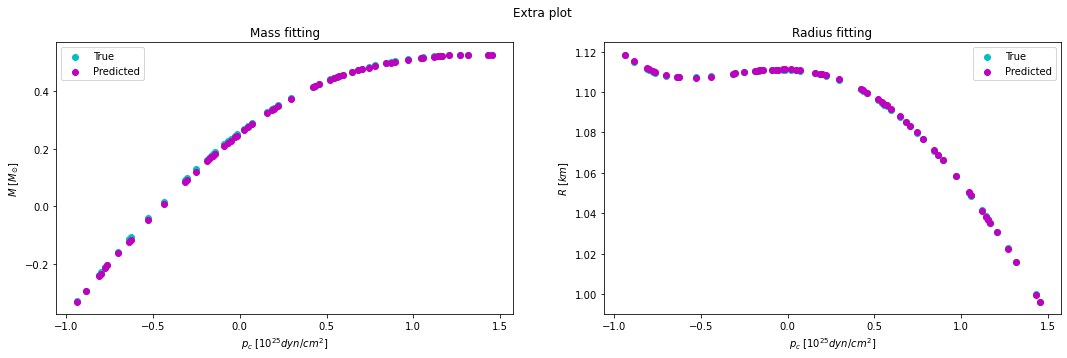

a =  22.0
2/2 [==============================] - 0s 2ms/step
MPD   :  0.063194  %
MAPE  :  0.182004  %


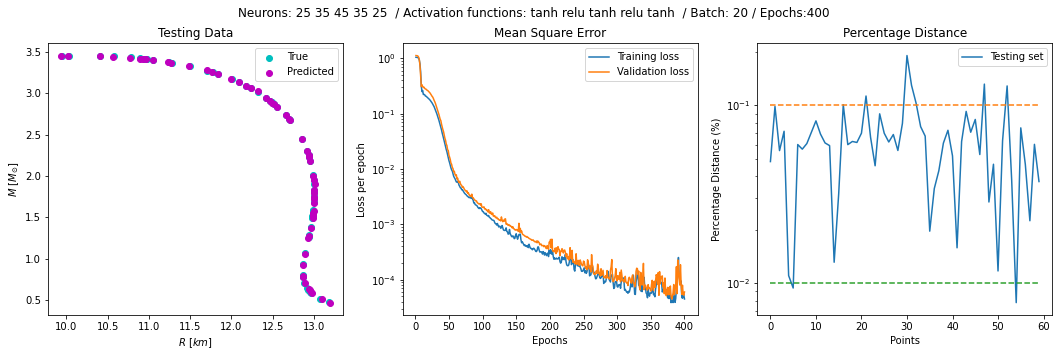

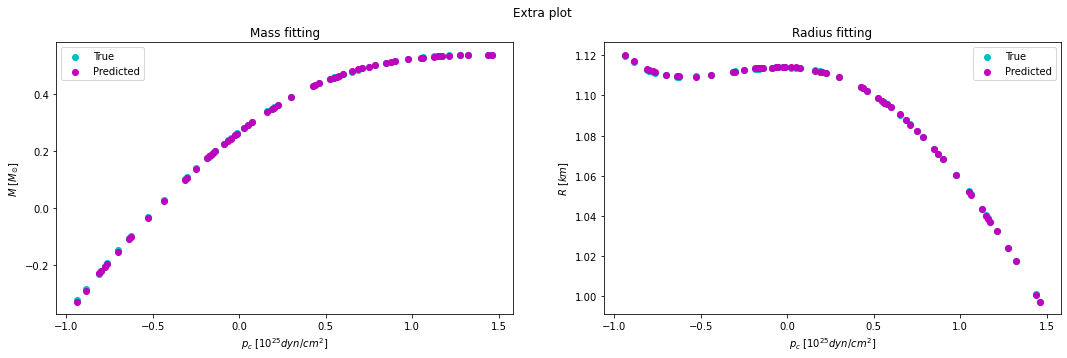

a =  23.6
2/2 [==============================] - 0s 4ms/step
MPD   :  0.040342  %
MAPE  :  0.091139  %


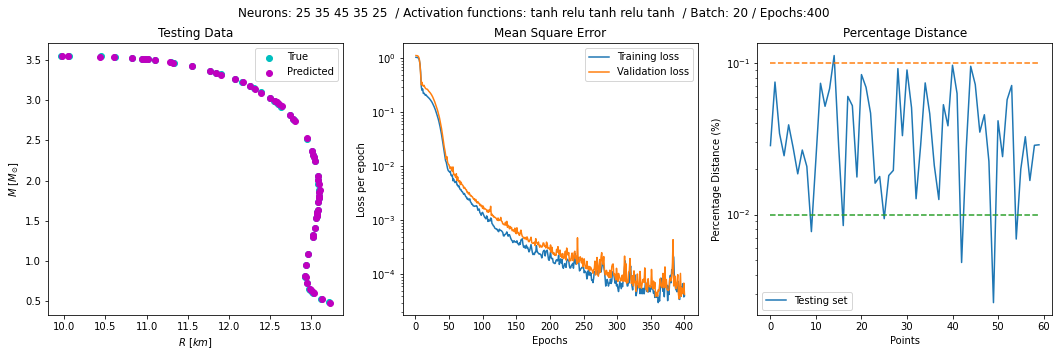

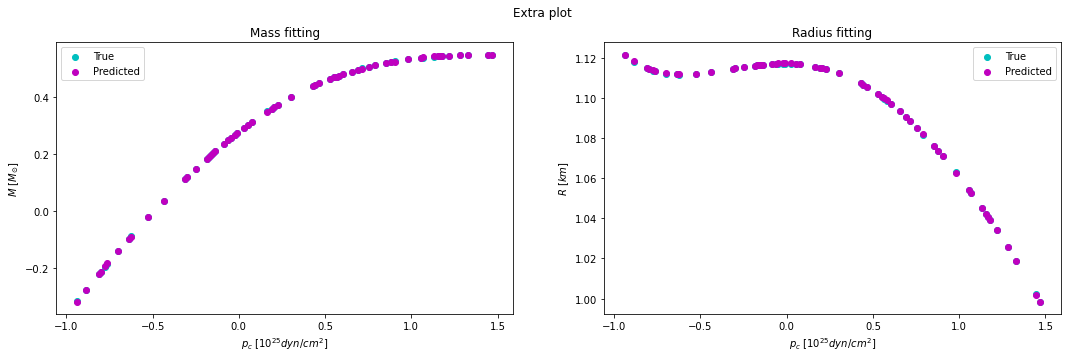

a =  25.2
2/2 [==============================] - 0s 2ms/step
MPD   :  0.131756  %
MAPE  :  0.40608  %


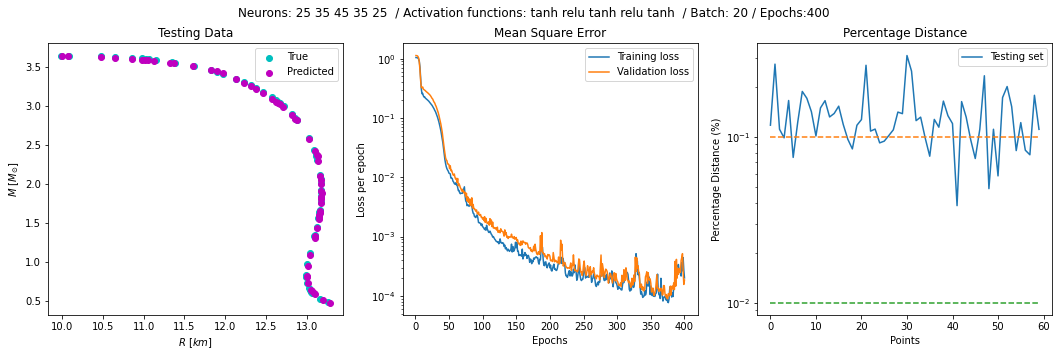

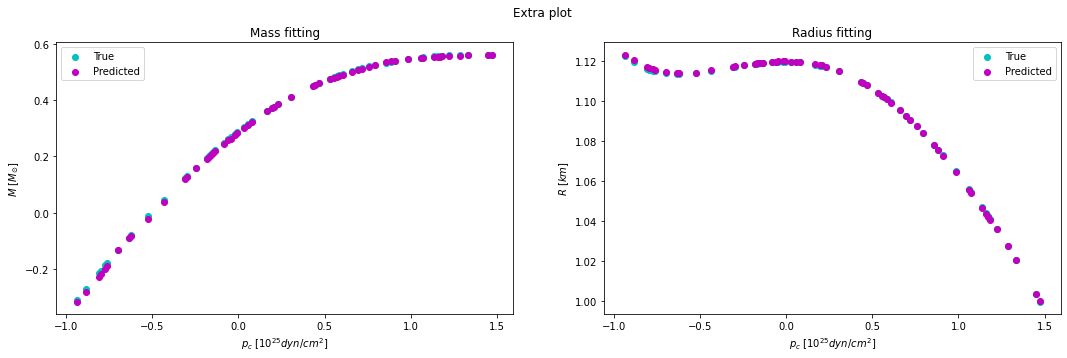

a =  26.8
2/2 [==============================] - 0s 3ms/step
MPD   :  0.060527  %
MAPE  :  0.172665  %


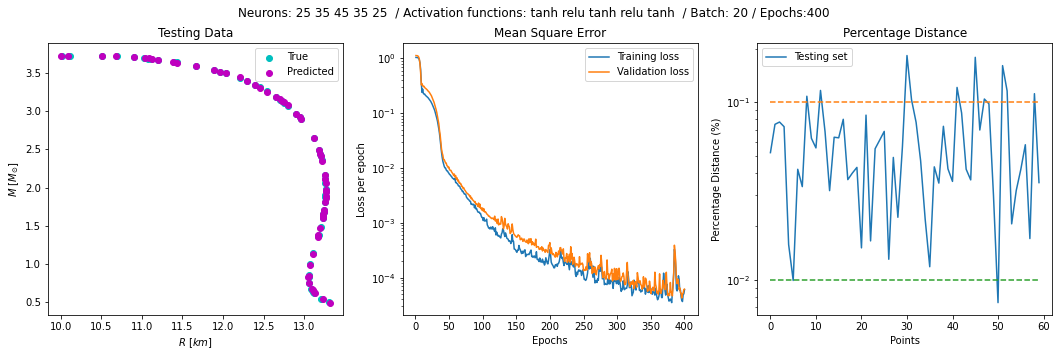

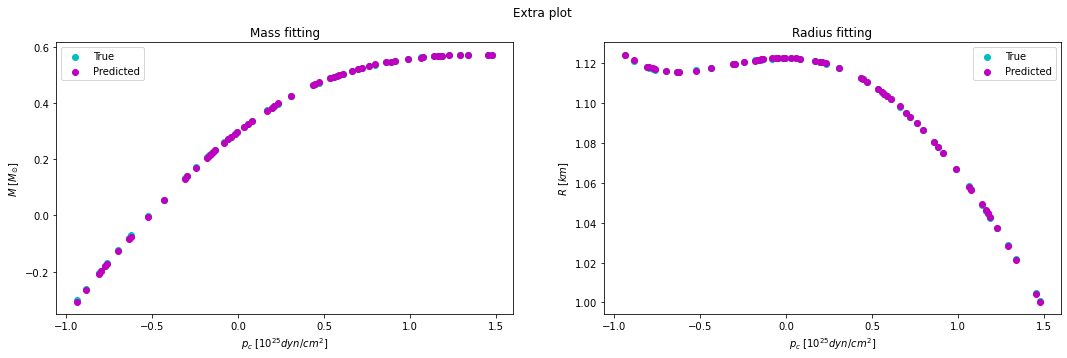

a =  28.4
2/2 [==============================] - 0s 3ms/step
MPD   :  0.081521  %
MAPE  :  0.149334  %


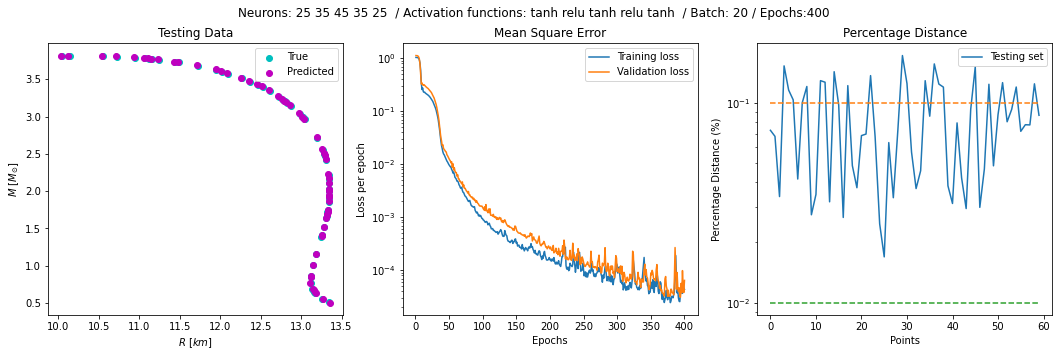

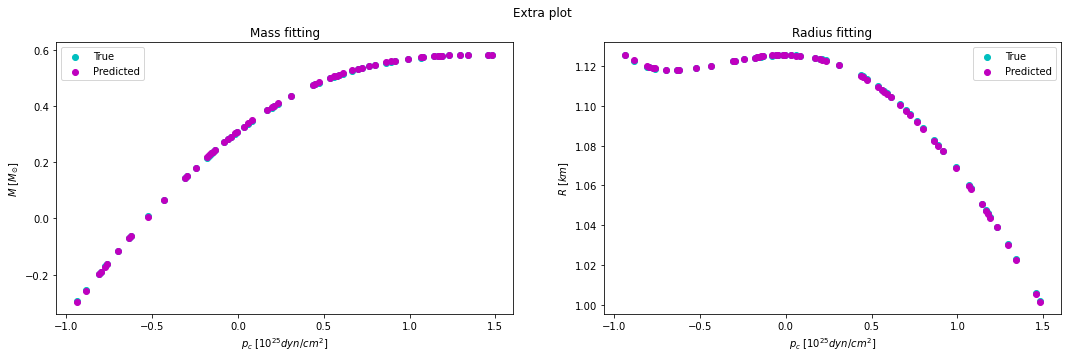

a =  30.0
2/2 [==============================] - 0s 2ms/step
MPD   :  0.045414  %
MAPE  :  0.110638  %


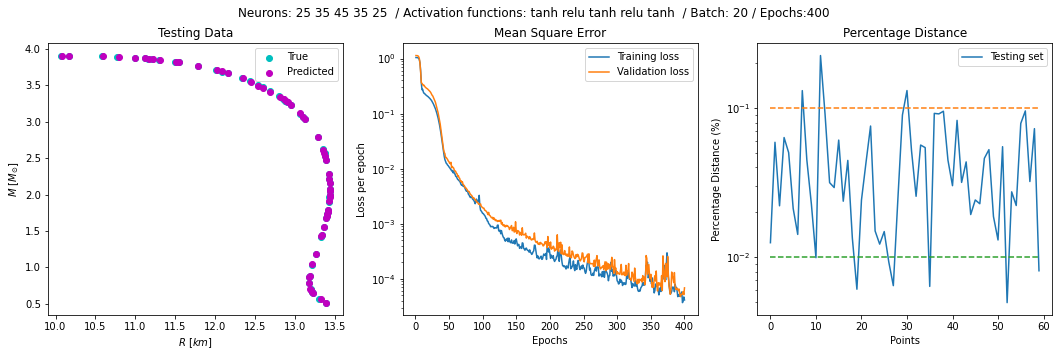

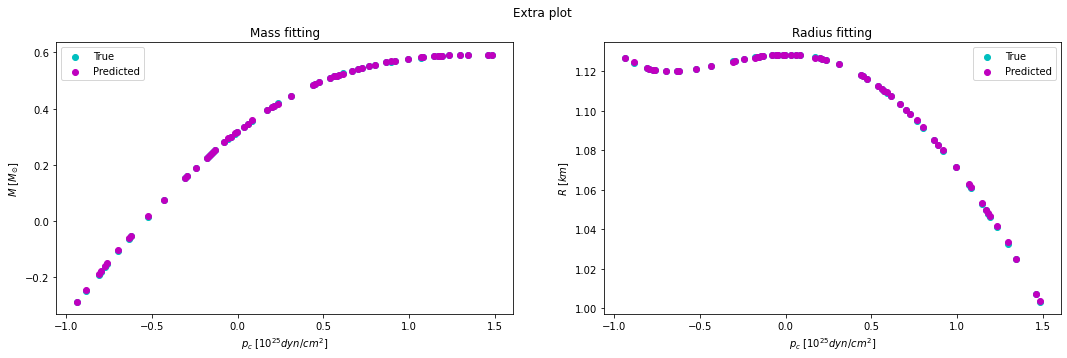

a =  31.6
2/2 [==============================] - 0s 3ms/step
MPD   :  0.044438  %
MAPE  :  0.09492  %


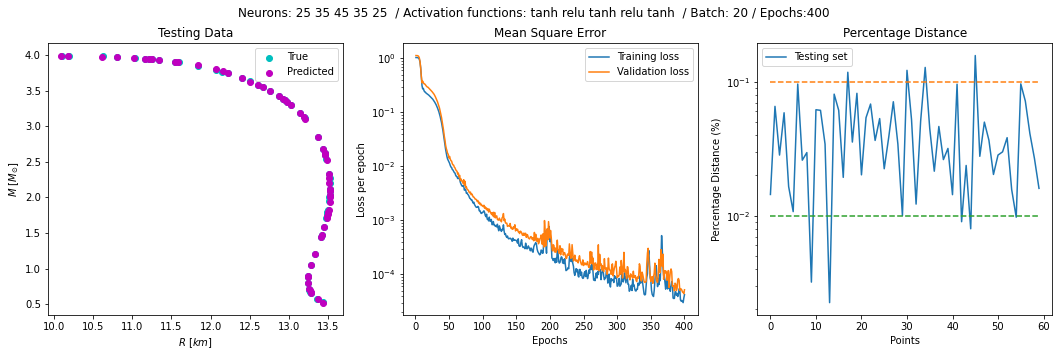

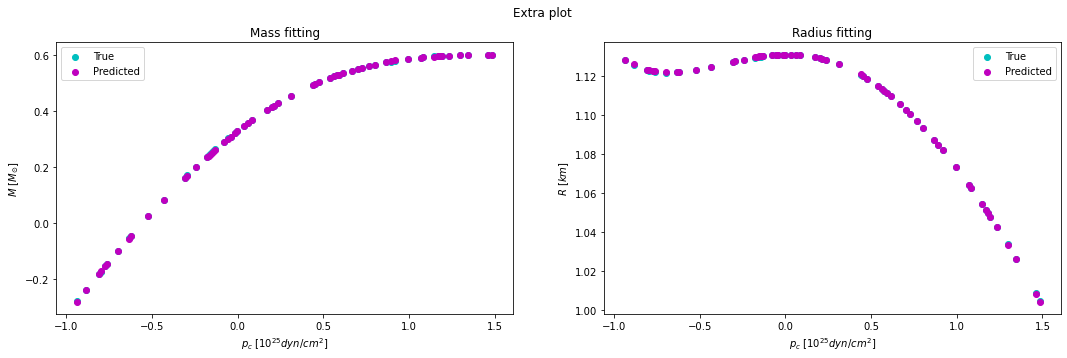

a =  33.2
2/2 [==============================] - 0s 2ms/step
MPD   :  0.114098  %
MAPE  :  0.425304  %


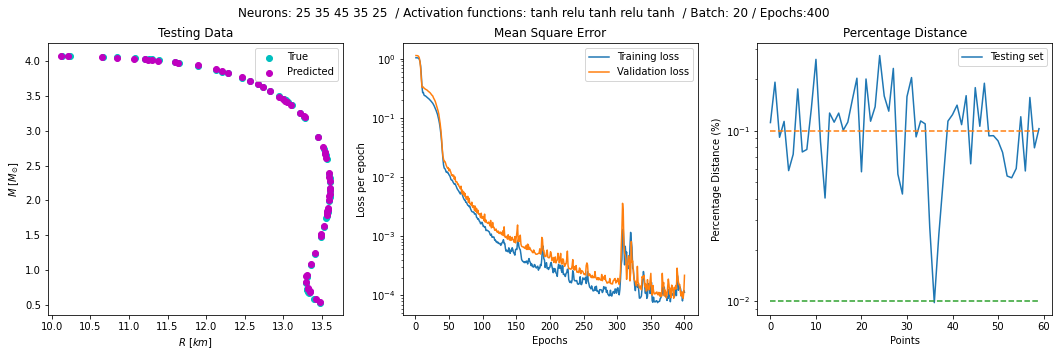

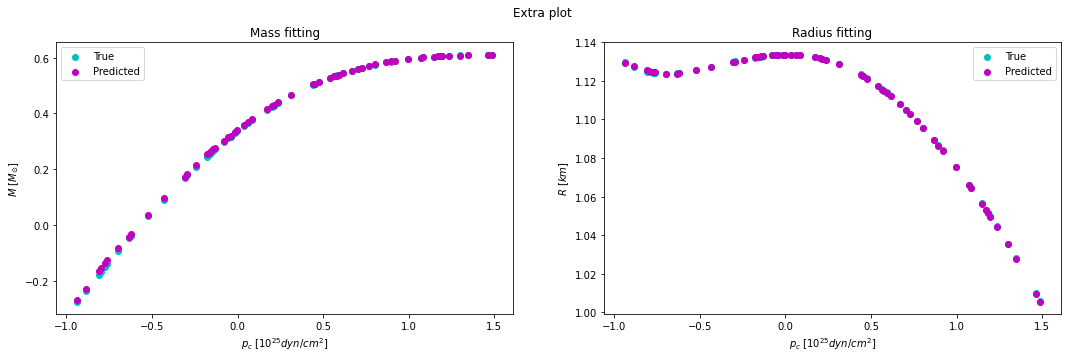

a =  34.8
2/2 [==============================] - 0s 2ms/step
MPD   :  0.10529  %
MAPE  :  0.251255  %


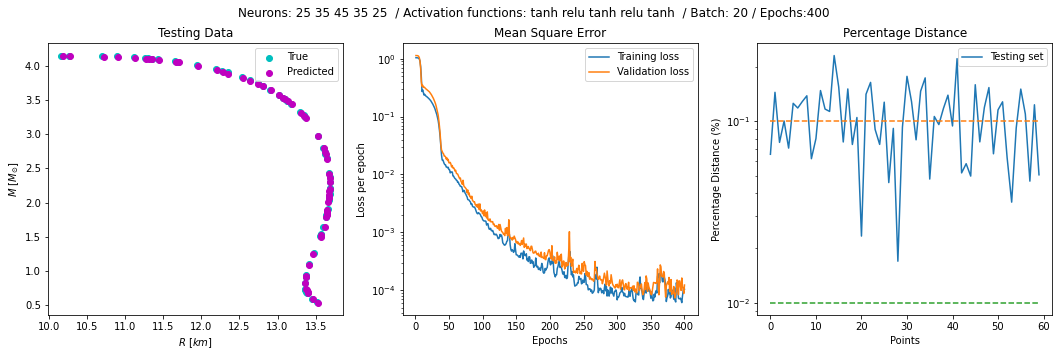

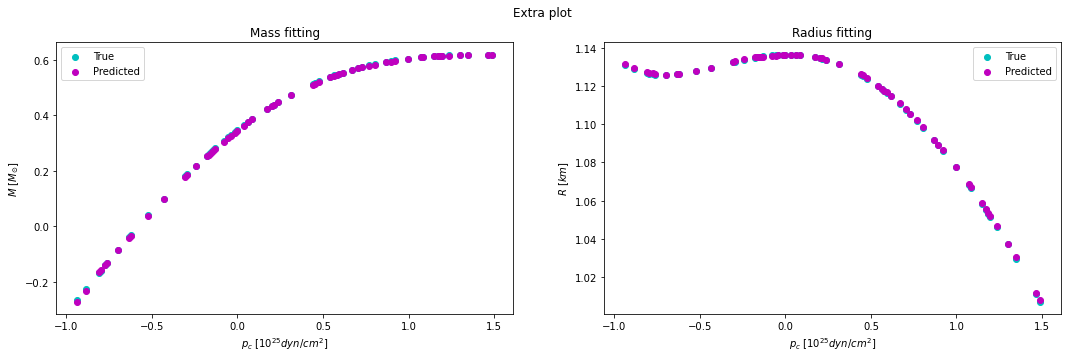

a =  36.4
2/2 [==============================] - 0s 2ms/step
MPD   :  0.075904  %
MAPE  :  0.187017  %


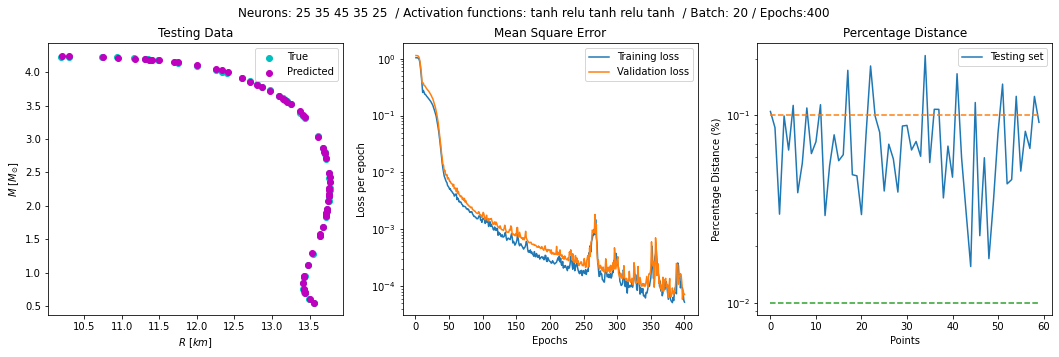

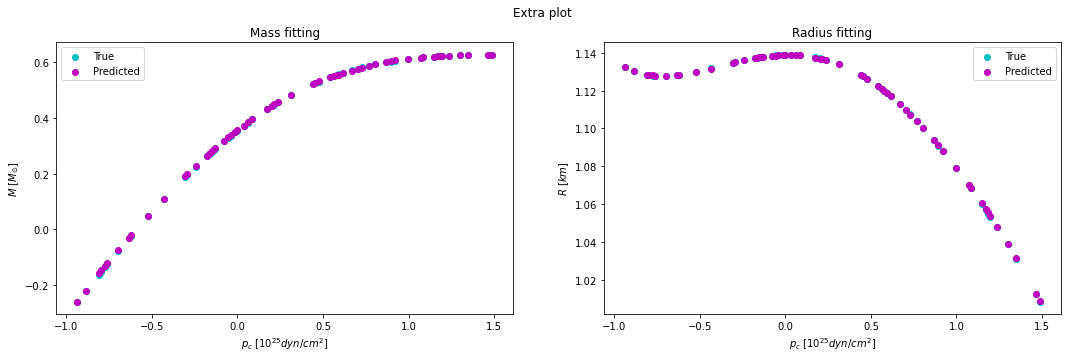

a =  38.0
2/2 [==============================] - 0s 3ms/step
MPD   :  0.074402  %
MAPE  :  0.209978  %


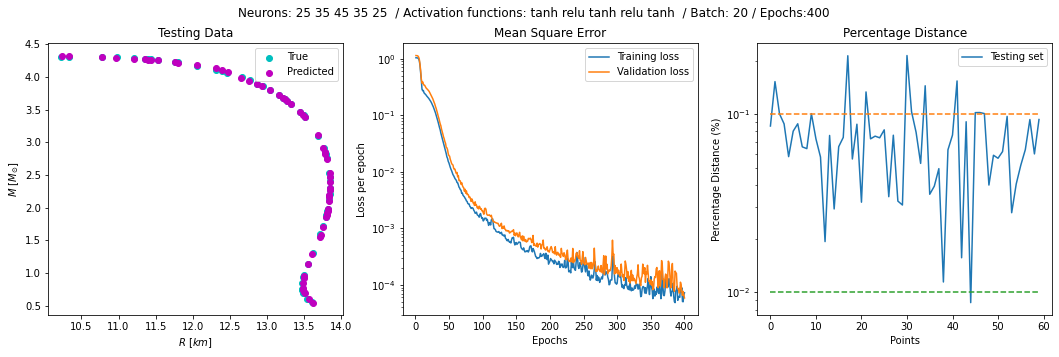

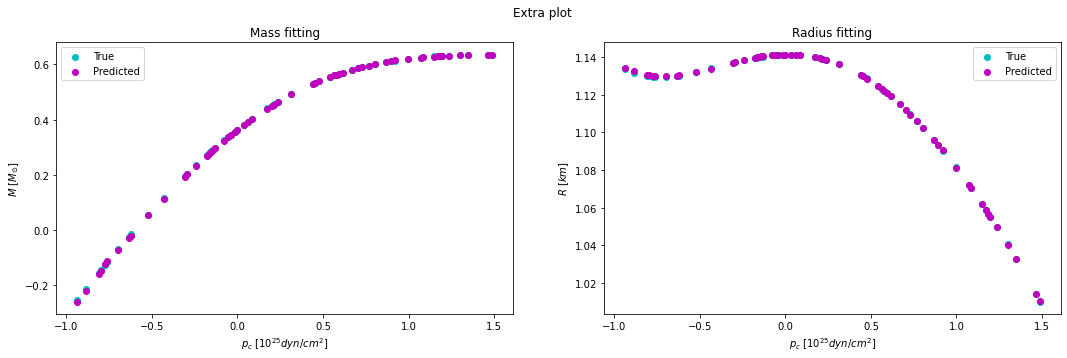

a =  39.6
2/2 [==============================] - 0s 2ms/step
MPD   :  0.062049  %
MAPE  :  0.152314  %


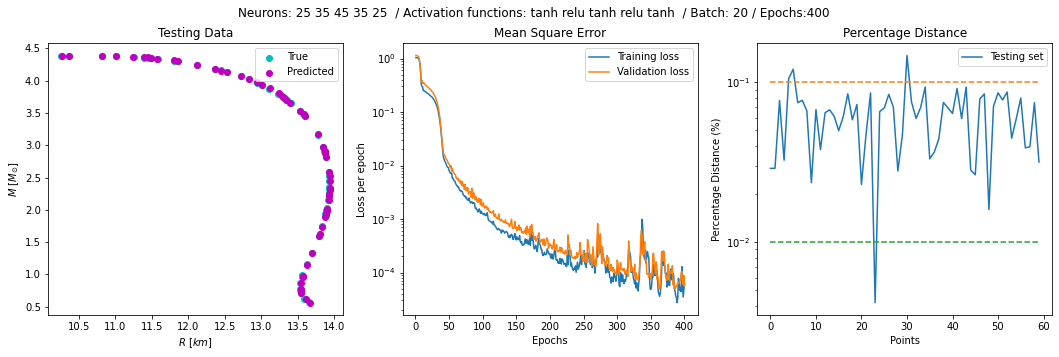

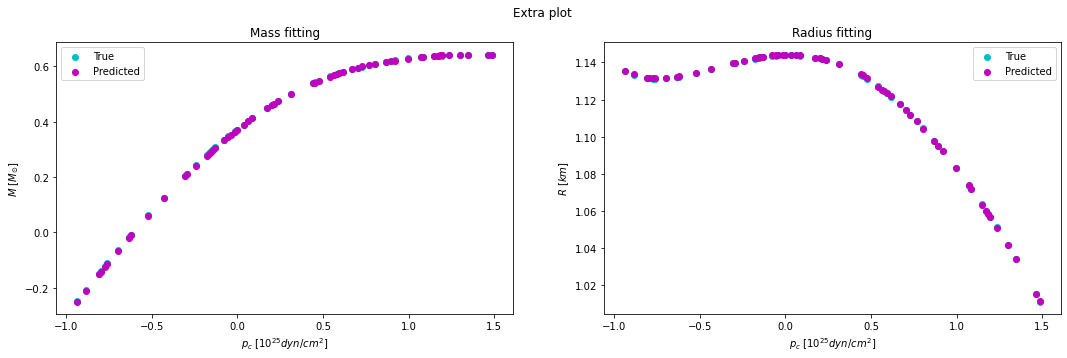

a =  41.2
2/2 [==============================] - 0s 2ms/step
MPD   :  0.042328  %
MAPE  :  0.132033  %


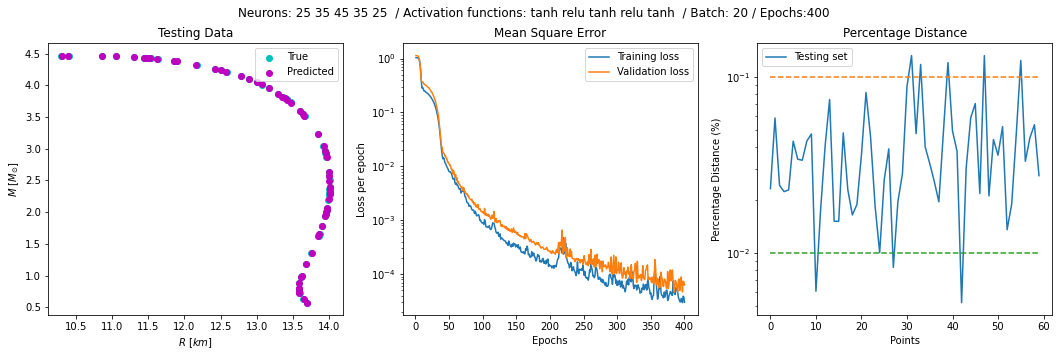

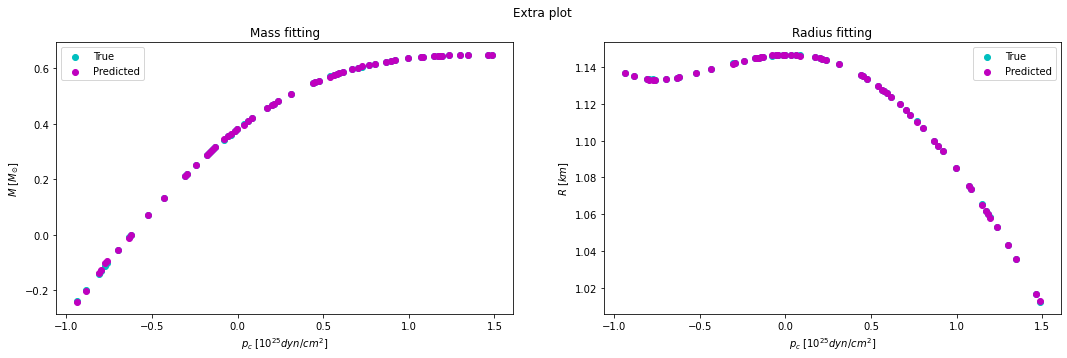

a =  42.8
2/2 [==============================] - 0s 2ms/step
MPD   :  0.061787  %
MAPE  :  0.14308  %


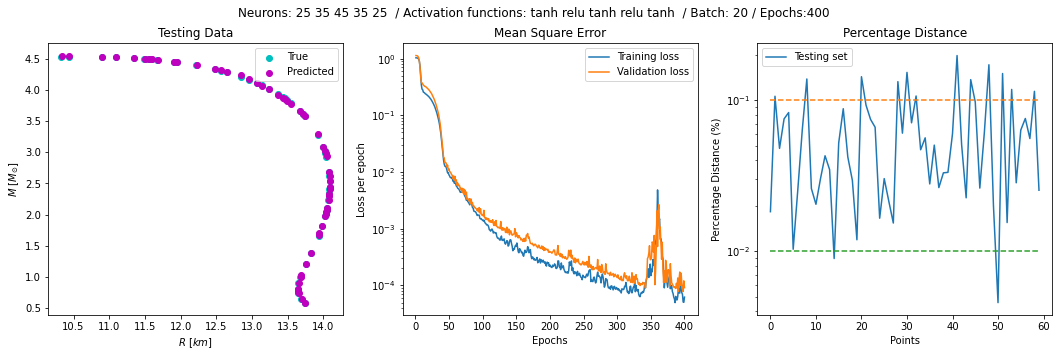

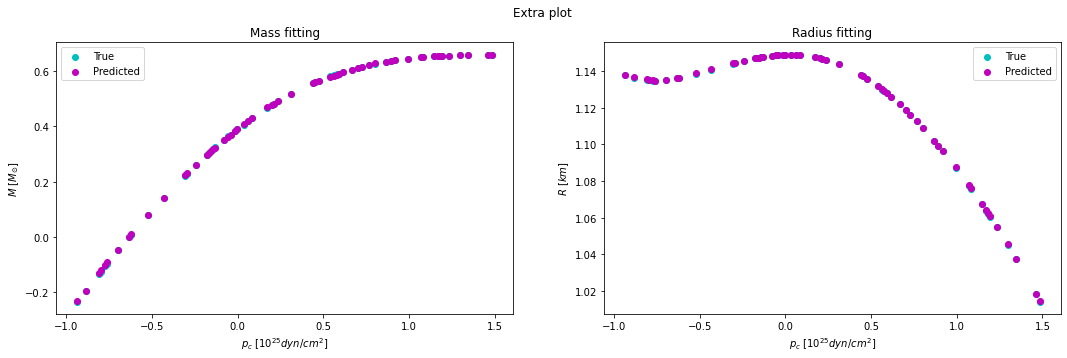

a =  44.4
2/2 [==============================] - 0s 3ms/step
MPD   :  0.073059  %
MAPE  :  0.134642  %


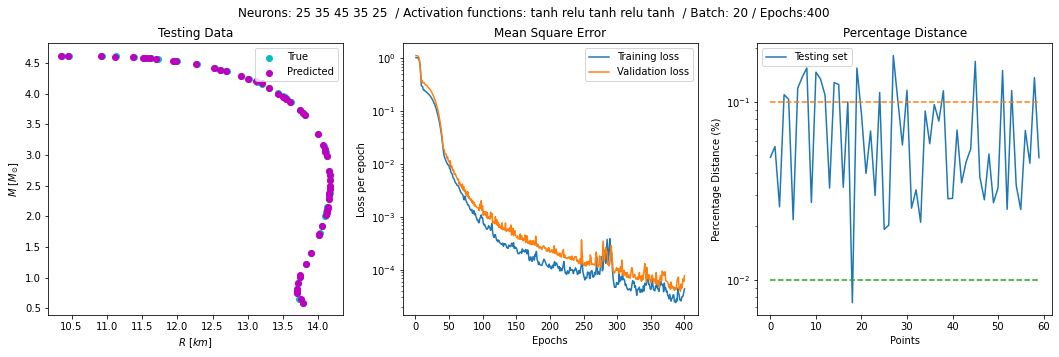

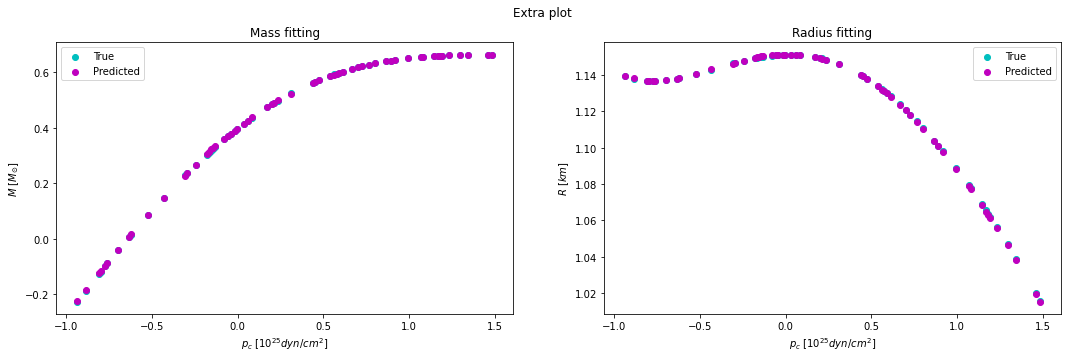

a =  46.0
2/2 [==============================] - 0s 3ms/step
MPD   :  0.155534  %
MAPE  :  0.218427  %


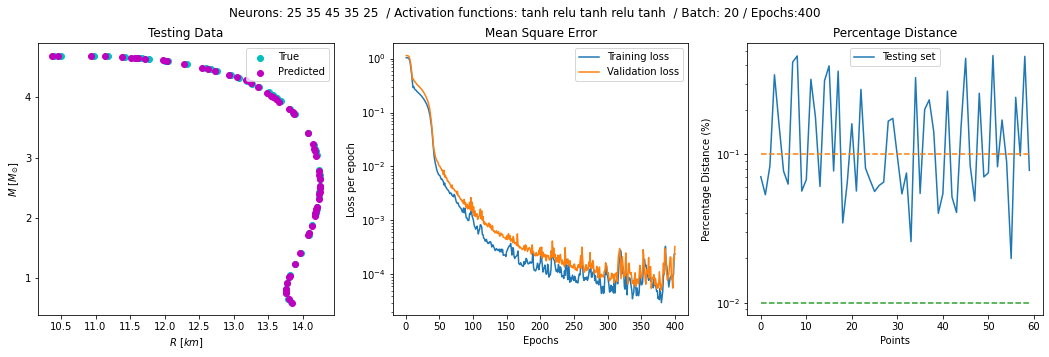

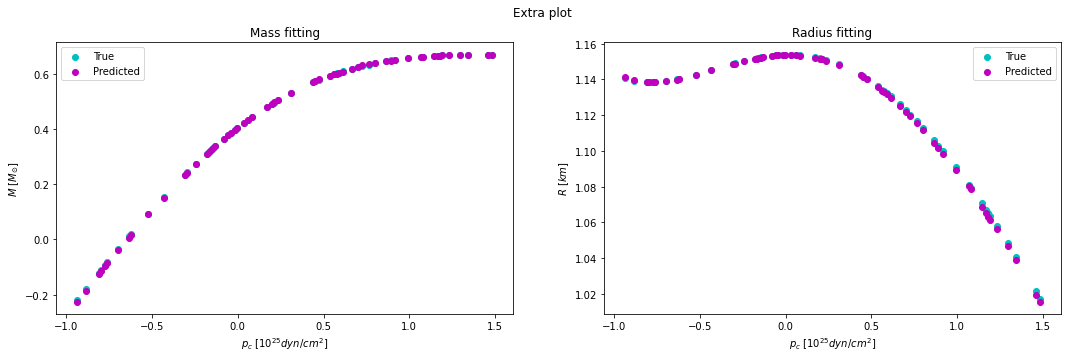

a =  47.6
2/2 [==============================] - 0s 2ms/step
MPD   :  0.086268  %
MAPE  :  0.253502  %


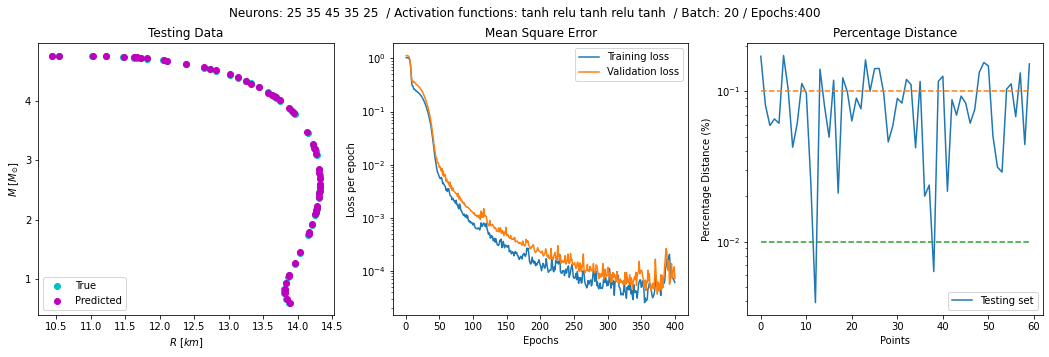

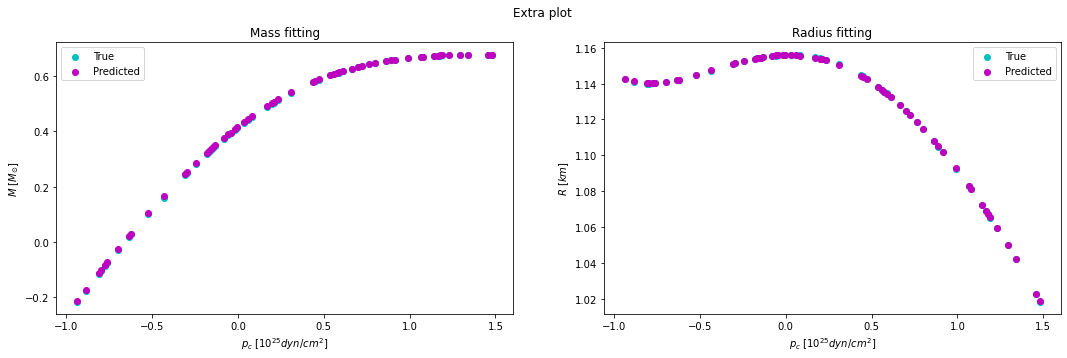

a =  49.2
2/2 [==============================] - 0s 2ms/step
MPD   :  0.066487  %
MAPE  :  0.164161  %


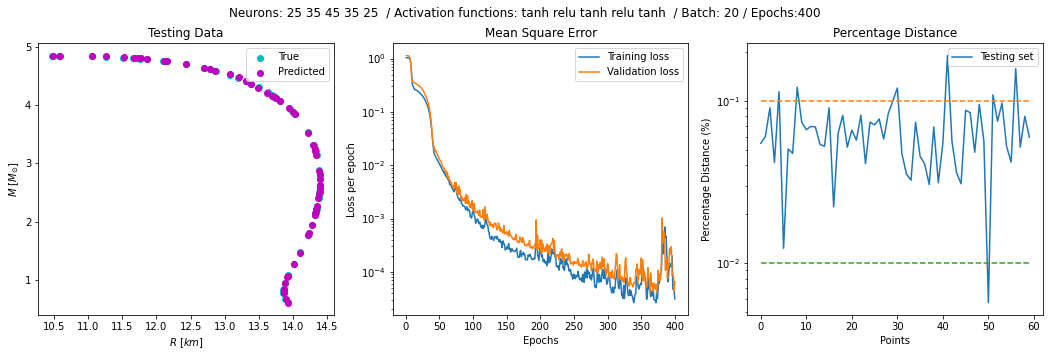

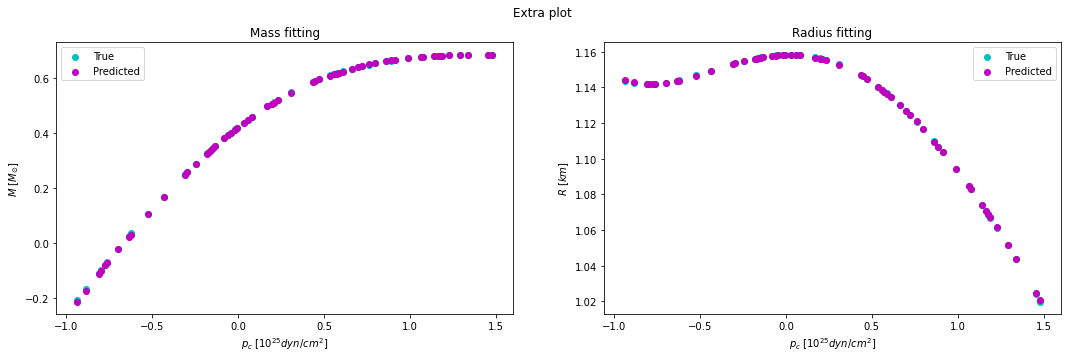

a =  50.8
2/2 [==============================] - 0s 2ms/step
MPD   :  0.058139  %
MAPE  :  0.149294  %


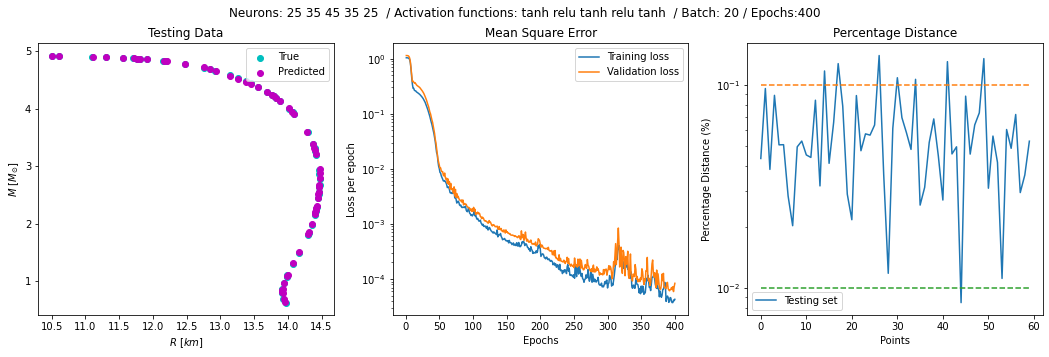

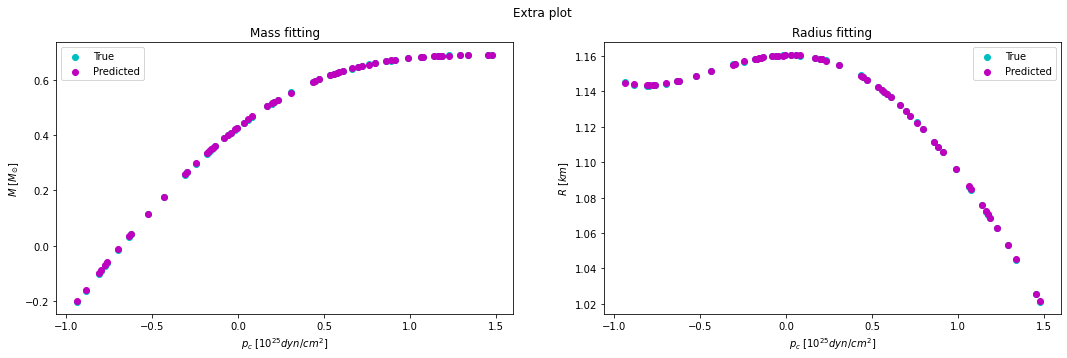

a =  52.4
2/2 [==============================] - 0s 3ms/step
MPD   :  0.066005  %
MAPE  :  0.171087  %


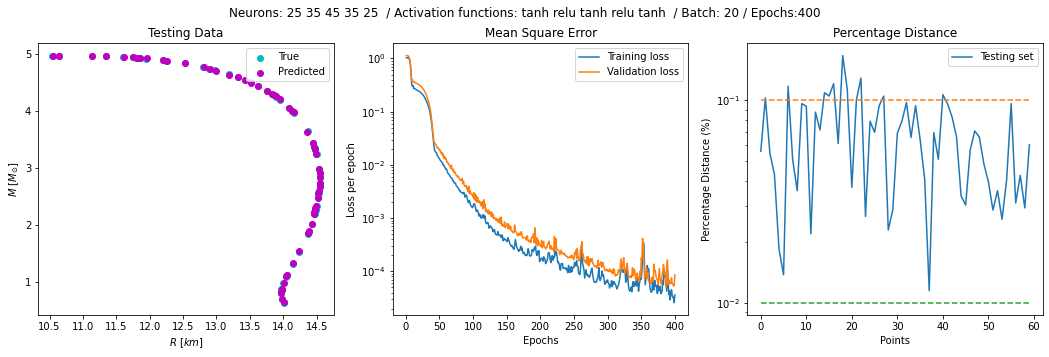

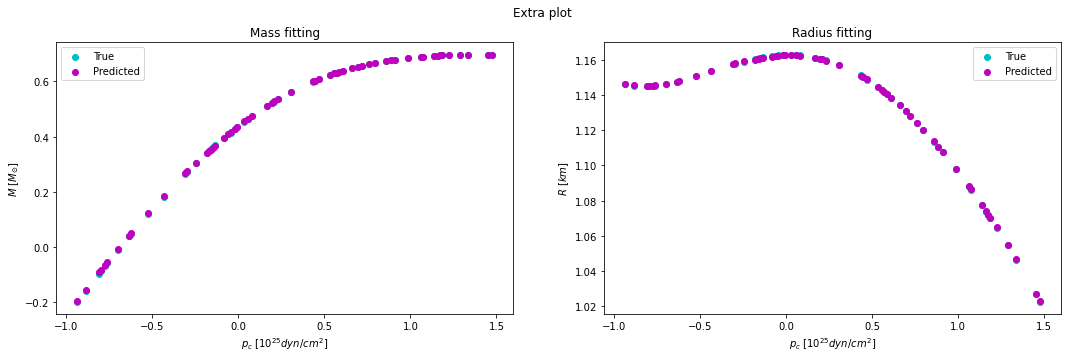

a =  54.0
2/2 [==============================] - 0s 2ms/step
MPD   :  0.119794  %
MAPE  :  0.393089  %


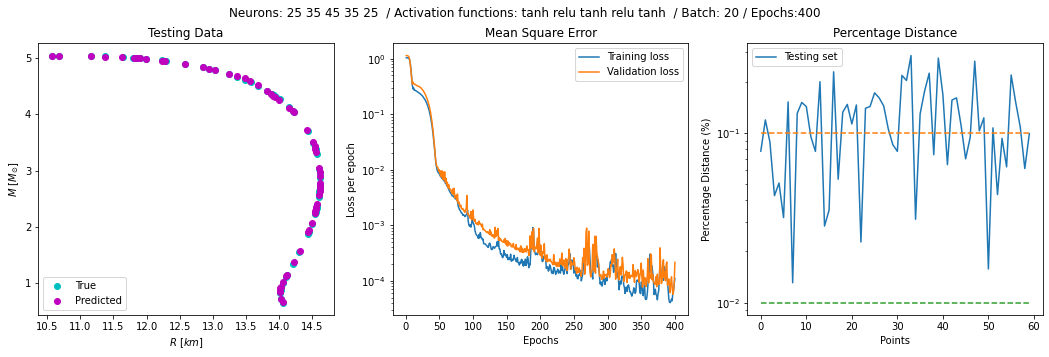

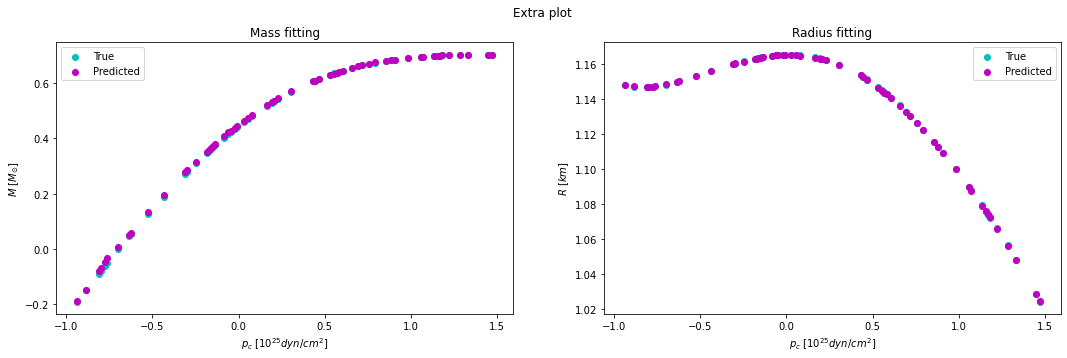

a =  55.6
2/2 [==============================] - 0s 2ms/step
MPD   :  0.05176  %
MAPE  :  0.092553  %


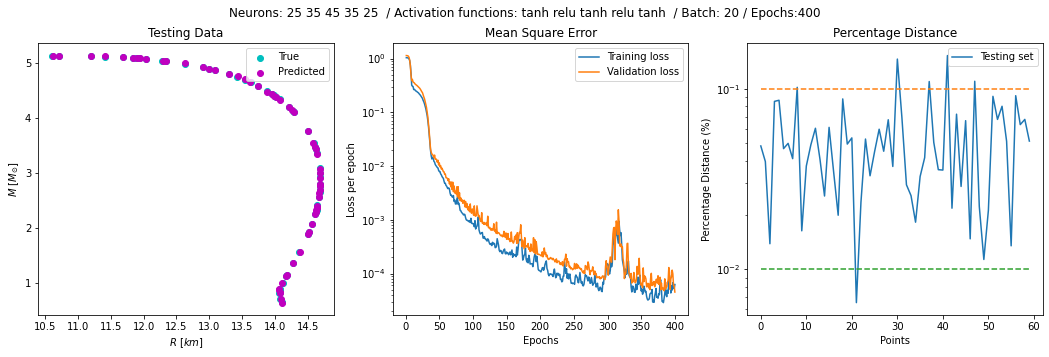

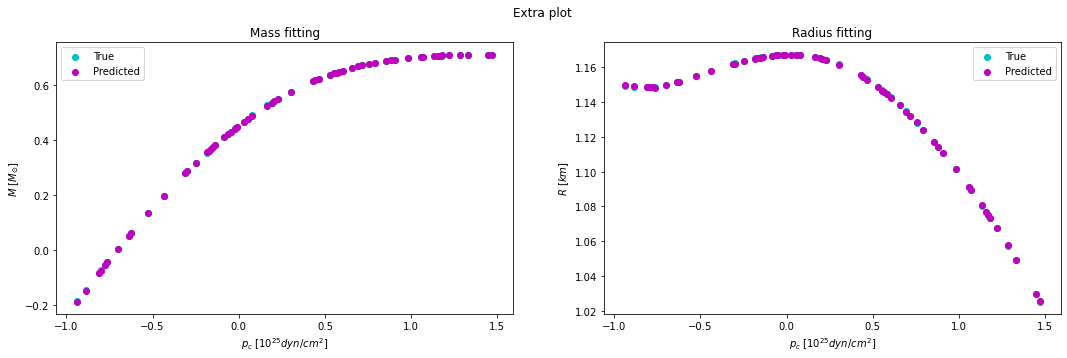

a =  57.2
2/2 [==============================] - 0s 2ms/step
MPD   :  0.073166  %
MAPE  :  0.173189  %


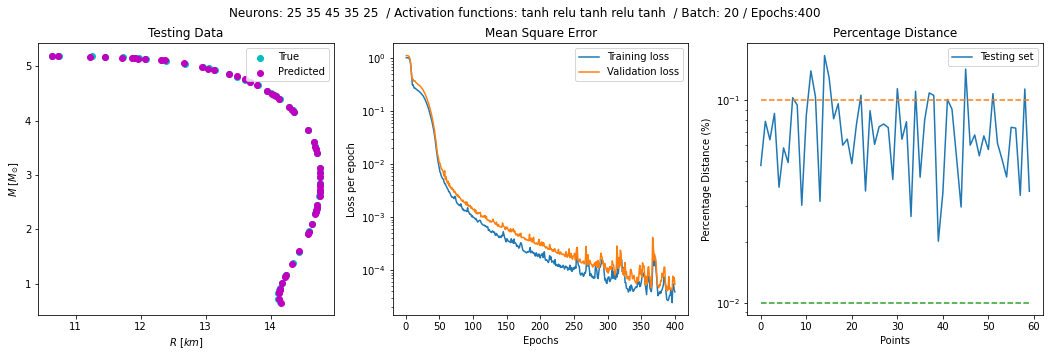

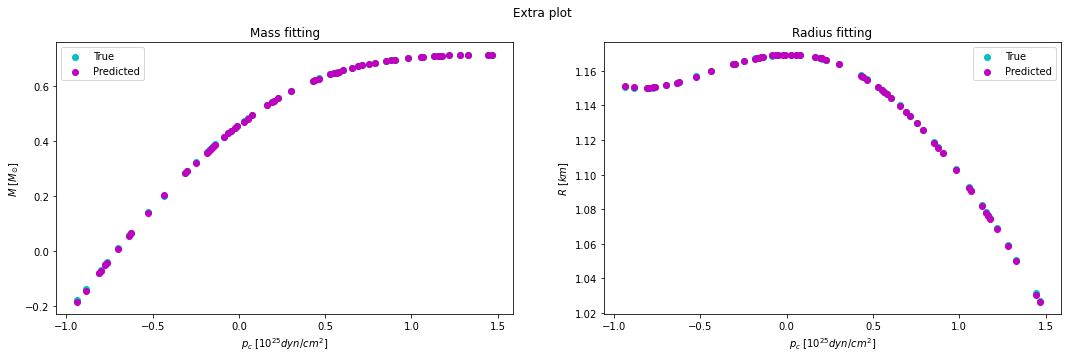

a =  58.8
2/2 [==============================] - 0s 3ms/step
MPD   :  0.049354  %
MAPE  :  0.126481  %


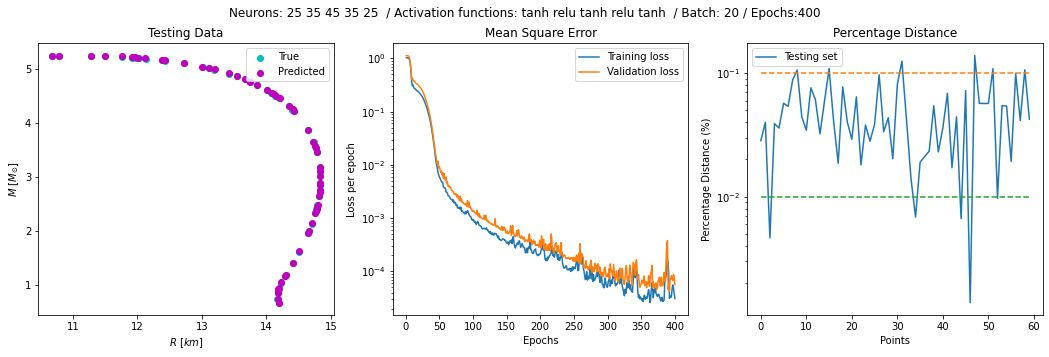

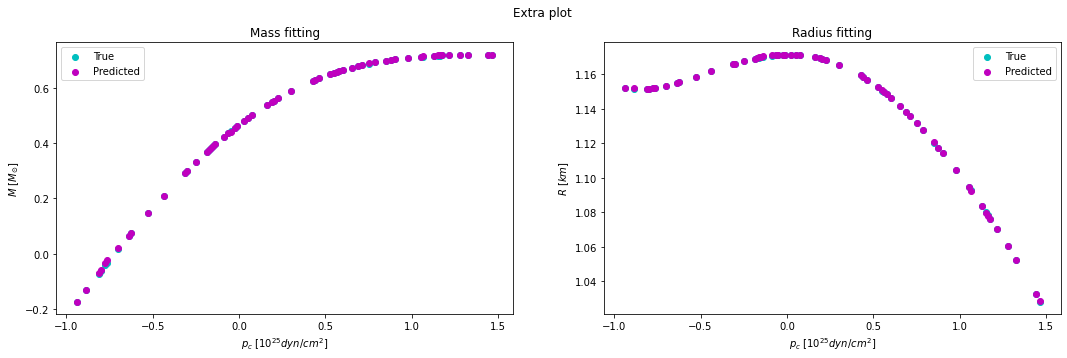

a =  60.4
2/2 [==============================] - 0s 2ms/step
MPD   :  0.057294  %
MAPE  :  0.120632  %


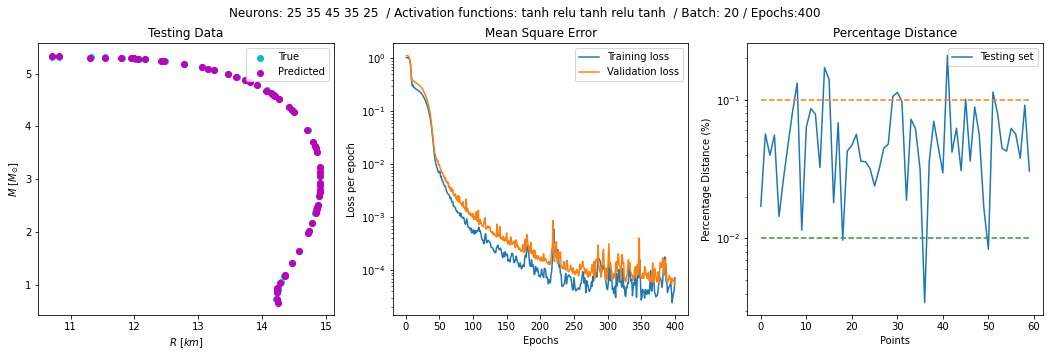

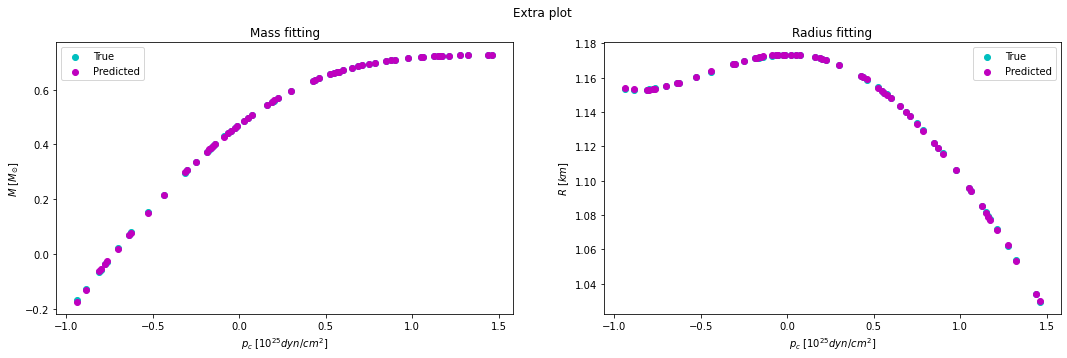

a =  62.0
2/2 [==============================] - 0s 3ms/step
MPD   :  0.063462  %
MAPE  :  0.104759  %


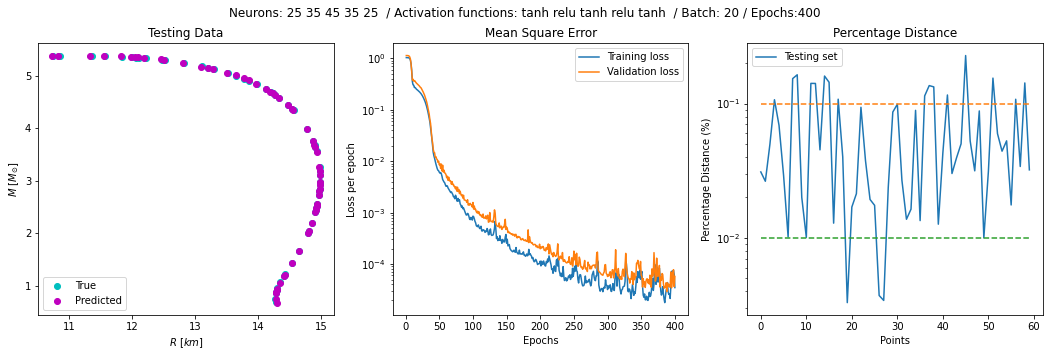

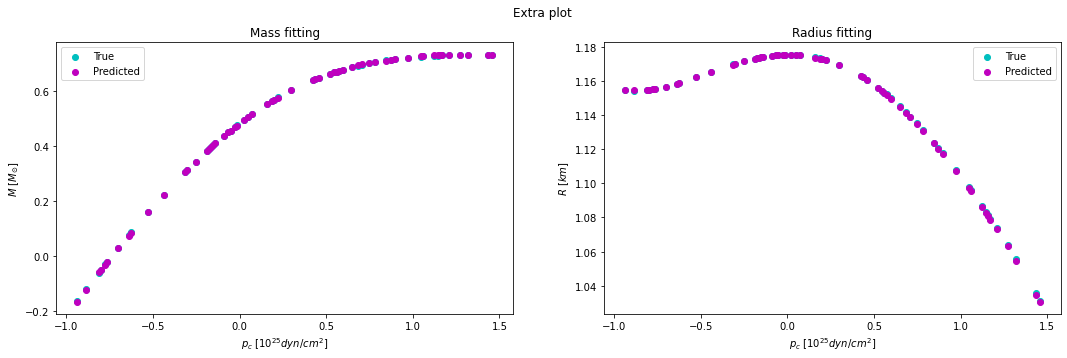

a =  63.6
2/2 [==============================] - 0s 3ms/step
MPD   :  0.069826  %
MAPE  :  0.14972  %


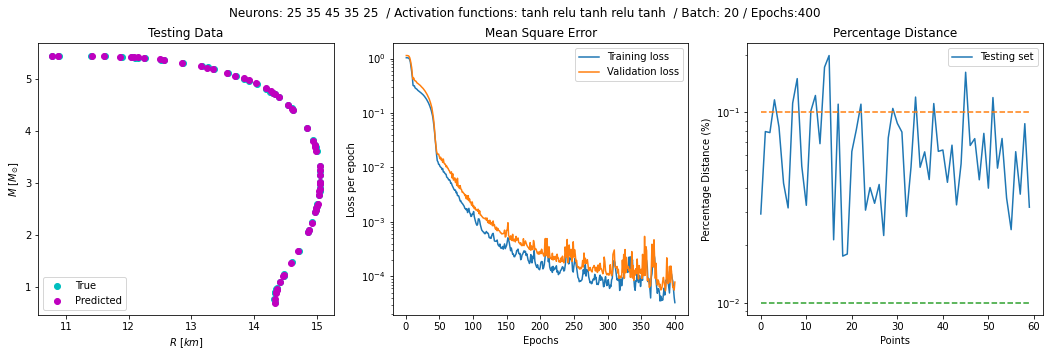

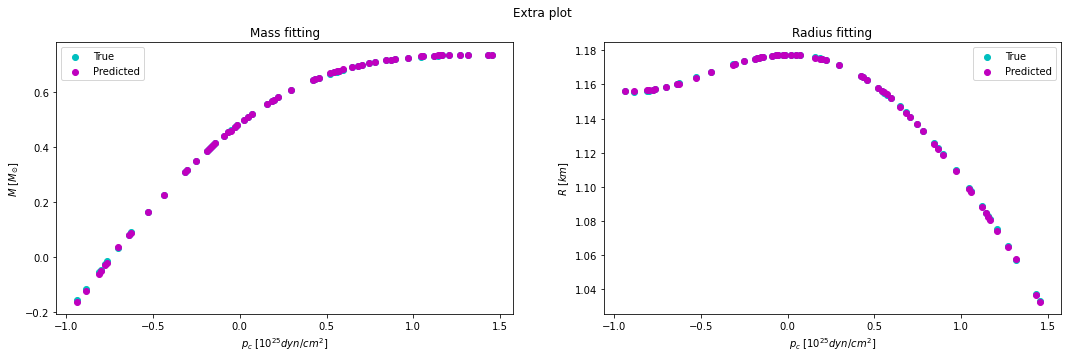

a =  65.2
2/2 [==============================] - 0s 3ms/step
MPD   :  0.05056  %
MAPE  :  0.107729  %


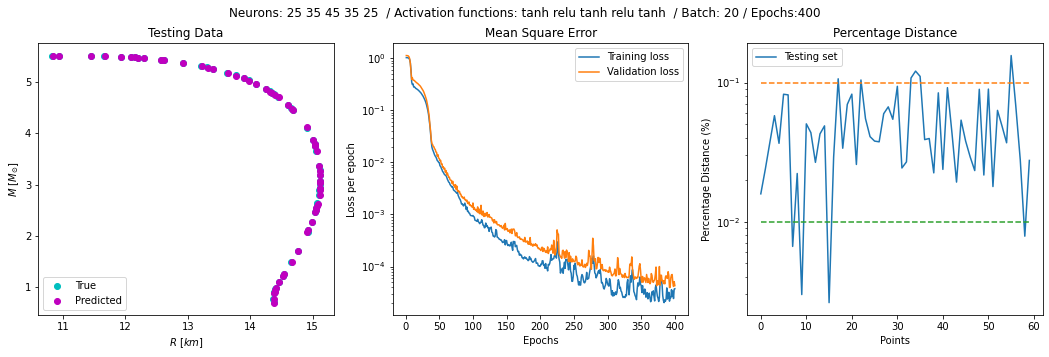

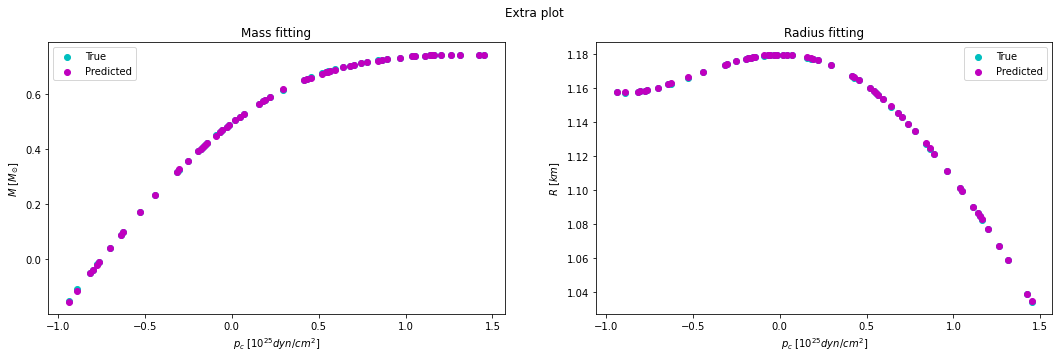

a =  66.8
2/2 [==============================] - 0s 3ms/step
MPD   :  0.075204  %
MAPE  :  0.116846  %


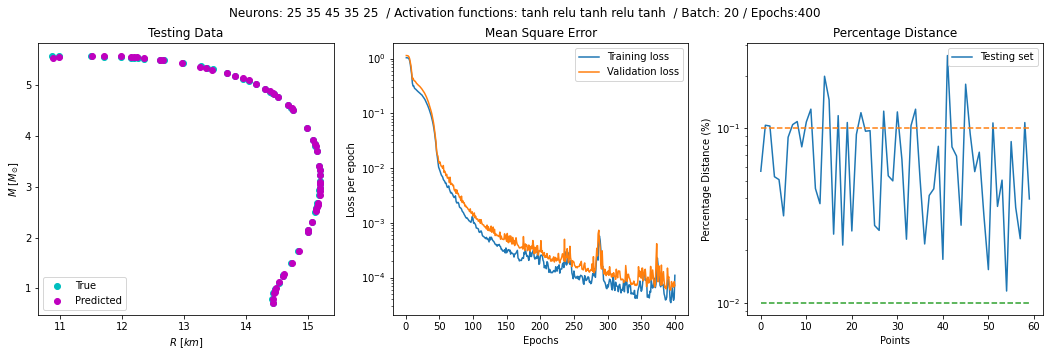

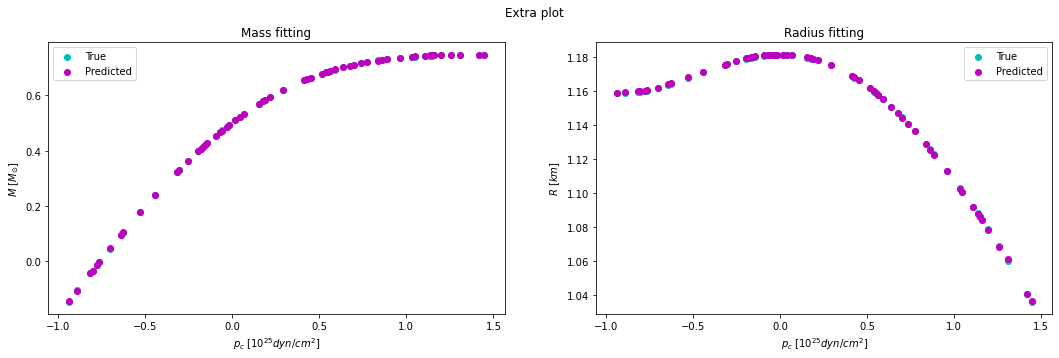

a =  68.4
2/2 [==============================] - 0s 3ms/step
MPD   :  0.078846  %
MAPE  :  0.169473  %


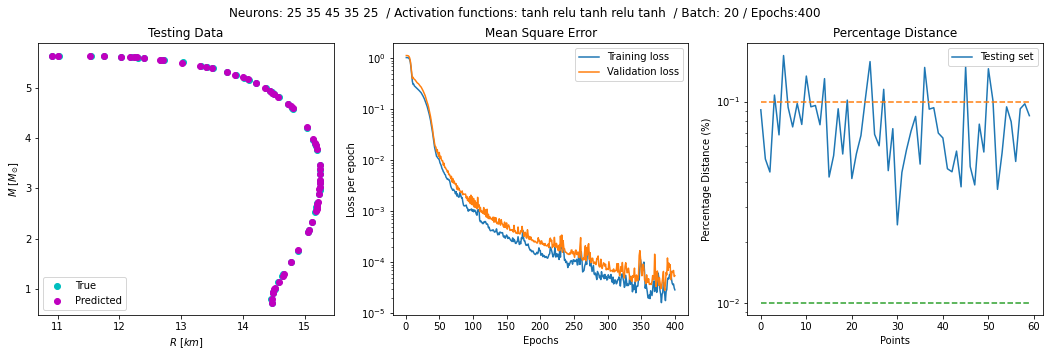

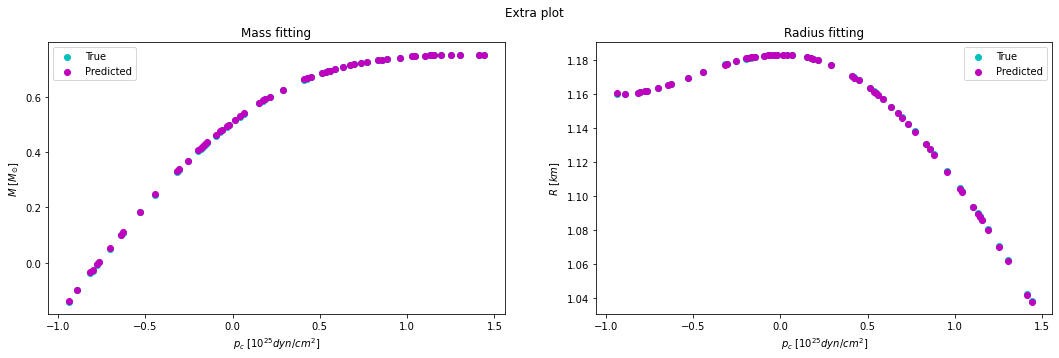

a =  70.0
2/2 [==============================] - 0s 2ms/step
MPD   :  0.067581  %
MAPE  :  0.112999  %


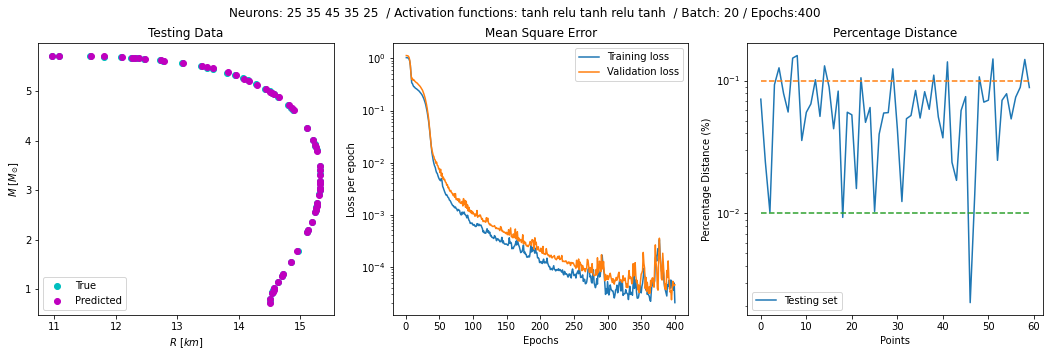

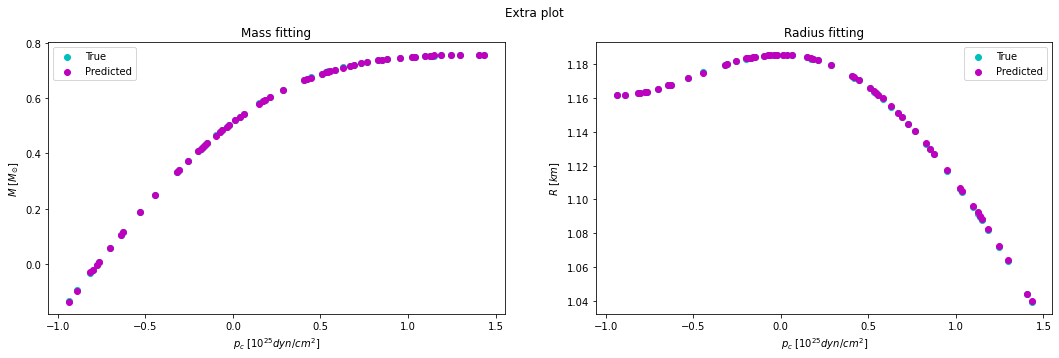

In [ ]:
# Fit to all aplhas
a_tot = pd.DataFrame({})
for a_ind in range(len(alpha_list)):
    df = df_data.copy()
    
    temp = df[df['a'] == alpha_list[a_ind]]
    temp.reset_index(drop = True, inplace = True)
    
    data = temp.copy()

    # Prepare the data
    X_train, X_test, y_train, y_test, PredictorScalerFit, TargetVarScalerFit = myfunc.prepare(data, talk = False)

    # Train the model
    print("a = ",alpha_list[a_ind])
    a_temp = best_model(X_train, X_test, y_train, y_test, PredictorScalerFit, TargetVarScalerFit)
    a_temp = pd.DataFrame(a_temp)
    fram   = [a_tot, a_temp]
    a_tot  = pd.concat(fram,ignore_index = True)

In [ ]:
# a_tot.to_csv(r"C:\Users\Desktop\Giannis\EGB\tuning_data\dif_alpha.csv")

## ANN for 2 inputs!

In [ ]:
df_alpha = pd.read_csv(r"C:\Users\Desktop\Giannis\EGB\alpha_list.csv")
alpha_list = list(df_alpha.a.values)
alpha_list.sort()

df_data = pd.read_csv(r"C:\Users\Desktop\Giannis\EGB\MRpa_data.csv")


# Log the data approprietly
df_data = myfunc.logdata(data     = df_data,
                         log_vars = ['p_c','M','R'],
                         lin_vars = ['a'])

df_data

p_c         M         R    a
0     -1.000000 -0.471098  1.110246 -0.4
1     -0.989045 -0.463526  1.108574 -0.4
2     -0.978089 -0.455974  1.106963 -0.4
3     -0.967134 -0.448443  1.105411 -0.4
4     -0.956179 -0.440950  1.103923 -0.4
...         ...       ...       ...  ...
10195  1.329922  0.425101  0.994600  9.2
10196  1.341870  0.425021  0.993100  9.2
10197  1.353818  0.424915  0.991591  9.2
10198  1.365767  0.424784  0.990074  9.2
10199  1.377715  0.424630  0.988548  9.2

[10200 rows x 4 columns]

In [ ]:
X_train, X_test, y_train, y_test, PredictorScalerFit, TargetVarScalerFit, three = myfunc.prepare(df_data, ['p_c','a'],True)

(7140, 2)
(7140, 2)
(3060, 2)
(3060, 2)


In [ ]:
dictio, two = myfunc.ann( eps                  = 20,
                     bat                  = 200,
                     layers               = 5,
                     X_train              = X_train,
                     y_train              = y_train,
                     X_test               = X_test,
                     y_test               = y_test,
                     neur_list            = [25, 35, 45, 35, 25],
                     activation_func_list = ['tanh', 'relu', 'tanh', 'relu', 'tanh'],
                     timer                = True,
                     performance          = True,
                     show_plot            = False,
                     show_extra_plot      = False,
                     PredictorScalerFit   = PredictorScalerFit,
                     TargetVarScalerFit   = TargetVarScalerFit,
                     Predictors           = ['p_c','a'])

96/96 [==============================] - 0s 1ms/step
MPD   :  0.455341  %
MAPE  :  1.186744  %


In [ ]:
dictio

{'MPD': [0.4553406209063152],
 'MAPE_R': [0.3250796361188198],
 'MAPE_M': [2.0484074853700385],
 'MAPE': [1.1867435607444292],
 'Max_PD': [3.8997973670344215],
 'Fin_Val_loss': [0.0020752286072820425],
 'Fin_Train_loss': [0.0019430936081334949],
 'Min_Val_loss': [[0.0020752286072820425, 19]],
 'Min_Train_loss': [[0.0019430936081334949, 19]],
 'Exe_time': [4.29282021522522],
 'eps': [20],
 'bat': [200],
 'neur_list': [[25, 35, 45, 35, 25]],
 'activation_func_list': [['tanh', 'relu', 'tanh', 'relu', 'tanh']]}

In [ ]:
two

p_c     a         M         R    M_pred    R_pred
0     0.437025  60.4  0.634862  1.160415  0.633722  1.159403
1     0.882380  -5.2  0.227339  1.002886  0.234180  1.002748
2    -0.262090   4.4  0.015828  1.080277  0.013425  1.079394
3     1.017724   4.4  0.364549  1.018520  0.356286  1.015050
4    -0.699722  58.8  0.016559  1.153287  0.005609  1.153617
...        ...   ...       ...       ...       ...       ...
3055  0.465118  34.8  0.518566  1.124500  0.508667  1.126561
3056  0.132099  26.8  0.357825  1.121809  0.364047  1.119177
3057  0.805526   2.8  0.330688  1.034143  0.324479  1.032280
3058  0.509779  -3.6  0.214434  1.037281  0.201171  1.035629
3059 -0.545250  36.4  0.030734  1.129415  0.017008  1.130929

[3060 rows x 6 columns]

In [ ]:
df_alpha = pd.read_csv(r"C:\Users\Desktop\Giannis\EGB\alpha_list.csv")
alpha_list = list(df_alpha.a.values)

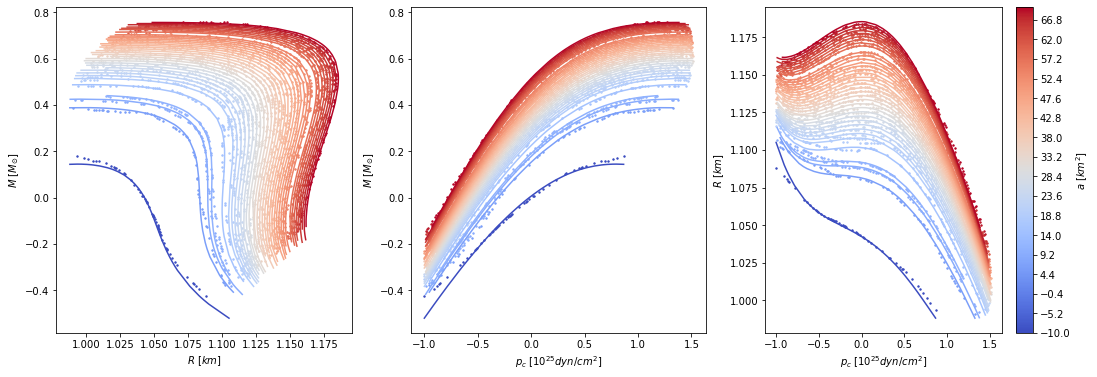

In [ ]:
every = 1

# Units
units = {
    'M'  :'M_{\odot}',
    'R'  :'km',
    'p_c':'10^{25} dyn/cm^2'
}

df = two.copy()
# All linear

a = alpha_list
clrs = a.copy()
clrs.sort()


norm = mpl.colors.Normalize(vmin=min(a), vmax=max(a))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)
cmap.set_array([])

fig, ax = plt.subplots(1,3, figsize = (18,6))
for i in range(0,len(alpha_list)):
    temp = df[df['a'] == alpha_list[i]].copy()
    
    temp.sort_values(by=['p_c'],inplace = True)
    
    r  = temp.R.values[::every]
    r1 = temp.R_pred.values[::every]
    
    m  = temp.M.values[::every]
    m1 = temp.M_pred.values[::every]
    
    pc = temp.p_c.values[::every]
    
    
    ax[0].plot(r, m, color=cmap.to_rgba(alpha_list[i]))#, s = 2)
    ax[0].scatter(r1, m1, color=cmap.to_rgba(alpha_list[i]), s = 2)

    ax[1].plot(pc, m, color=cmap.to_rgba(alpha_list[i]))#, s = 2)
    ax[1].scatter(pc, m1, color=cmap.to_rgba(alpha_list[i]), s = 2)
    
    ax[2].plot(pc, r, color=cmap.to_rgba(alpha_list[i]))#, s = 2)
    ax[2].scatter(pc, r1, color=cmap.to_rgba(alpha_list[i]), s = 2)


cbar = fig.colorbar(cmap, ticks=clrs[::3])
cbar.set_label('$a$ [$km^2$]', rotation=90)

name = "$R$ [$"+units["R"]+"$]"
ax[0].set_xlabel(name)
name = "$M$ [$"+units["M"]+"$]"
ax[0].set_ylabel(name)

name = "$p_c$ [$"+units["p_c"]+"$]"
ax[1].set_xlabel(name)
name = "$M$ [$"+units["M"]+"$]"
ax[1].set_ylabel(name)

name = "$p_c$ [$"+units["p_c"]+"$]"
ax[2].set_xlabel(name)
name = "$R$ [$"+units["R"]+"$]"
ax[2].set_ylabel(name)

plt.show()

In [ ]:
trial = two.sort_values(by=['a']).copy()
trial

p_c     a         M         R    M_pred    R_pred
686  -0.905770 -10.0 -0.458633  1.090216 -0.392292  1.082744
2421 -0.472311 -10.0 -0.202999  1.057322 -0.196637  1.057244
2409 -0.208466 -10.0 -0.075482  1.048977 -0.080547  1.049652
909  -0.519426 -10.0 -0.228307  1.059240 -0.219655  1.059377
1926 -0.641925 -10.0 -0.296999  1.065498 -0.277718  1.065351
...        ...   ...       ...       ...       ...       ...
96    0.988412  70.0  0.747483  1.111571  0.750233  1.115043
470   0.766105  70.0  0.729709  1.140114  0.726915  1.140216
2702  0.531448  70.0  0.693562  1.163581  0.686688  1.162841
1113  0.000381  70.0  0.514878  1.185389  0.511535  1.183822
886   0.370893  70.0  0.655158  1.174907  0.650735  1.173135

[3060 rows x 6 columns]

In [ ]:
for metr in range(50):
    print(np.sum(trial['a'] == clrs[metr]))

56
0
0
0
0
0
0
0
0
0
56
0
66
62
0
0
60
0
52
62
53
66
62
71
49
79
55
56
63
55
71
60
57
53
55
60
68
51
59
60
55
0
67
50
66
51
66
68
50
64


In [ ]:
triall = PredictorScalerFit.inverse_transform(X_test).T[1]

In [ ]:
np.sum(triall == clrs[1])

0